In [1]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20})
import warnings
warnings.filterwarnings("ignore")

# Time Series

https://en.wikipedia.org/wiki/Time_series



- In mathematics, a time series is a series of data points indexed (or listed or graphed) in time order.


- Most commonly, a time series is a sequence taken at successive equally spaced points in time. 
- Thus it is a sequence of discrete-time data. 
- Examples of time series are heights of ocean tides, counts of sunspots, and the daily closing value of the Dow Jones Industrial Average.


- A time series is very frequently plotted via a run chart (which is a temporal line chart).


- Time series are used in statistics, signal processing, pattern recognition, econometrics, mathematical finance, weather forecasting, earthquake prediction, electroencephalography, control engineering, astronomy, communications engineering, and largely in any domain of applied science and engineering which involves temporal measurements.



- Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. 


- Time series forecasting is the use of a model to predict future values based on previously observed values. 
- While regression analysis is often employed in such a way as to test relationships between one or more different time series, this type of analysis is not usually called "time series analysis", which refers in particular to relationships between different points in time within a single series.



- Time series data have a natural temporal ordering.
- This makes time series analysis distinct from cross-sectional studies, in which there is no natural ordering of the observations (e.g. explaining people's wages by reference to their respective education levels, where the individuals' data could be entered in any order).


- Time series analysis is also distinct from spatial data analysis where the observations typically relate to geographical locations (e.g. accounting for house prices by the location as well as the intrinsic characteristics of the houses). 



- A stochastic model for a time series will generally reflect the fact that observations close together in time will be more closely related than observations further apart. 
- In addition, time series models will often make use of the natural one-way ordering of time so that values for a given period will be expressed as deriving in some way from past values, rather than from future values (see time reversibility).



## Methods for analysis

- Methods for time series analysis may be divided into two classes: 
    - frequency-domain methods 
    - time-domain methods
    
- The former include spectral analysis and wavelet analysis; the latter include auto-correlation and cross-correlation analysis.
- In the time domain, correlation and analysis can be made in a filter-like manner using scaled correlation, thereby mitigating the need to operate in the frequency domain.


- Additionally, time series analysis techniques may be divided into parametric and non-parametric methods. 
- The parametric approaches assume that the underlying stationary stochastic process has a certain structure which can be described using a small number of parameters (for example, using an autoregressive or moving average model).


- In these approaches, the task is to estimate the parameters of the model that describes the stochastic process. 
- By contrast, non-parametric approaches explicitly estimate the covariance or the spectrum of the process without assuming that the process has any particular structure.


- Methods of time series analysis may also be divided into linear and non-linear, and univariate and multivariate.

## Panel data

- A time series is one type of panel data.
- Panel data is the general class, a multidimensional data set, whereas a time series data set is a one-dimensional panel (as is a cross-sectional dataset). 


- A data set may exhibit characteristics of both panel data and time series data. 
- One way to tell is to ask what makes one data record unique from the other records. 
- If the answer is the time data field, then this is a time series data set candidate.
- If determining a unique record requires a time data field and an additional identifier which is unrelated to time (e.g. student ID, stock symbol, country code), then it is panel data candidate.
- If the differentiation lies on the non-time identifier, then the data set is a cross-sectional data set candidate.

# Forecasting

- Forecasting is the process of analyzing historical data to predict future values. It is a supervised learning problem.

- It is more similar to regression since we try to predict real-valued numbers.

- Given the historic values of a feature x till the present time t (x1, x2, x3 … xt ), we need to predict the value of this feature for the future (xt+1, xt+2, ...).

- In forecasting, Unlike regression, we do not have a set of inputs and one output. Rather, we have a signal and we are looking at some past values to predict some future value.


- Every business operates under risk and uncertainty. The forecast is necessary to lessen the adverse effects of the risks.


# Time series data

- A signal, indexed by an ordered timestamp is time-series data.

- A time series is a sequence of measurements on the same variable collected over time.

- It is a set of observations, each one being recorded at equally spaced time intervals.
- For our data to be a time series, we need a minimum of two things
    - Date/timestamp (denoted as t)
    - One quantity (denoted as y)

- The timestamp(t) can be in days, weeks, months, years, or even seconds.

- Data observations like sales, revenues, inventories, etc are commonly expressed as a time series.

- There are two types of time series present:

    - Univariate time series - Data collected only for one variable over a period of time.
    - Multivariate time series - Data collected only for more than one variable over the same period of time.


- Time series data are not independent.
- Since there is dependency, the ordering of the time series data is most important.
- Changing the order will change the data structure.


## Handling missing values

- Time series data does not admit missing values.
- All the observations in the data must be contiguous.
- There are many ways to impute the missing data:
    - Mean / Median imputation
    - Interpolation
    - Moving Averages



In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 6)


# Problem Statement : 

- data scientist at a mobile manufacturing company
- forecast their future sales for better planning and revenue . 

    1. want to undertand the pattern in demand  to be able to better plan for factory maintenance / staffing requirements. 
    2. need a certain level of accuracy. the management requires that the mean absolute percentage error is not more than 5%. 
    3. need a range forecast to supplement the point forecast to make ecuated trade off wherever needed. 

In [3]:
mobile_sales = pd.read_excel('mobilesales.xlsx')


## Forecasting: 

    Y0 , Y1 , Y2 , .... , Yt , Yt-1,  Yt,  Yt+1 ... 
    
    
    
    data looks like:         
      Y : ---------------------|----|----|[-----]           time-axis 
               y-train          y-val      y_hat 
                                y-test    (predicted)

In [4]:
mobile_sales.head(10)

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0
5,2001-06-01,8104.0
6,2001-07-01,7813.0
7,2001-08-01,8279.0
8,2001-09-01,7014.0
9,2001-10-01,7985.0


In [5]:
mobile_sales.dtypes

DATE     datetime64[ns]
Sales           float64
dtype: object

In [6]:
mobile_sales["Sales"].describe()

count      198.000000
mean     10842.757576
std       2605.006293
min        108.000000
25%       8856.000000
50%      10745.000000
75%      12399.750000
max      23740.000000
Name: Sales, dtype: float64

In [7]:
mobile_sales["DATE"].describe()

count                     217
unique                    217
top       2001-01-01 00:00:00
freq                        1
first     2001-01-01 00:00:00
last      2019-01-01 00:00:00
Name: DATE, dtype: object

In [8]:
mobile_sales["DATE"].min(),mobile_sales["DATE"].max()

(Timestamp('2001-01-01 00:00:00'), Timestamp('2019-01-01 00:00:00'))

In [9]:
(mobile_sales["DATE"].max()-mobile_sales["DATE"].min()) / np.timedelta64(1,"M")

215.9880079673094

In [10]:
(mobile_sales["DATE"].max()-mobile_sales["DATE"].min()) / np.timedelta64(1,"Y")

17.99900066394245

In [11]:
# 18 years of data. 
17.99900066394245*12

215.9880079673094

In [12]:
217-215.988
# approx 12 months of data missing ! 
# lets check 

1.0120000000000005

In [13]:
mobile_sales.isna().sum()

DATE      0
Sales    19
dtype: int64

In [14]:
mobile_sales.head()

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0


In [15]:
mobile_sales.set_index("DATE",inplace=True)

In [16]:
mobile_sales.head(20)

,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0
2001-06-01,8104.0
2001-07-01,7813.0
2001-08-01,8279.0
2001-09-01,7014.0


<AxesSubplot:xlabel='DATE'>

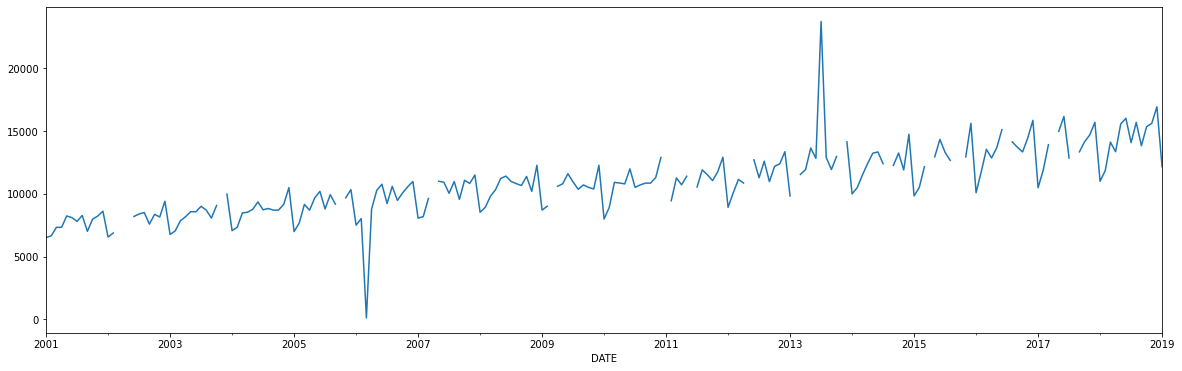

In [17]:
mobile_sales["Sales"].plot()


In [18]:
# there are two spikes in upper and lower side. -OUTLIERS
# and ther are missing data


<AxesSubplot:xlabel='DATE'>

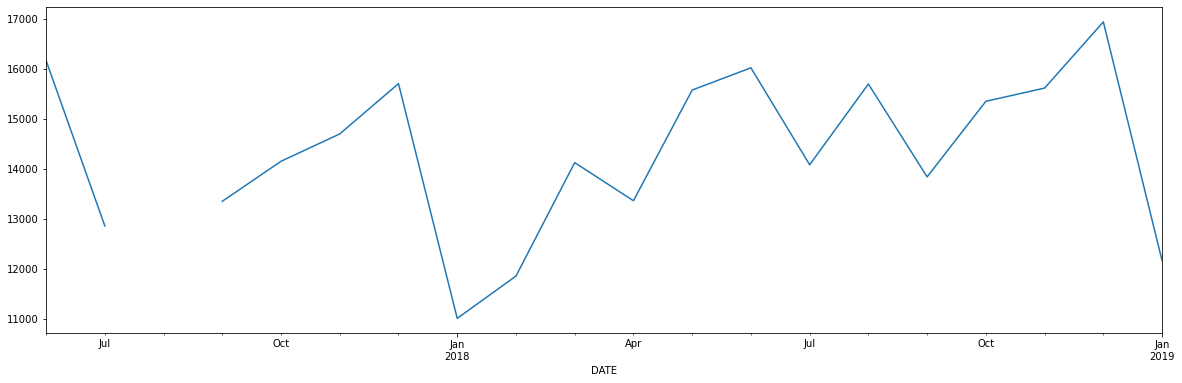

In [19]:
mobile_sales["Sales"].tail(20).plot()

In [20]:
# imputing missing with 0

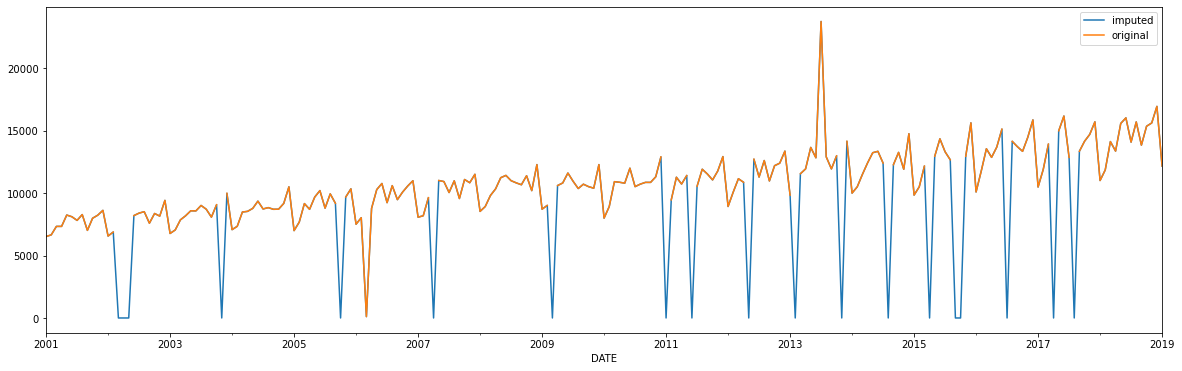

In [21]:
mobile_sales.Sales.fillna(0).plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

In [22]:
df = mobile_sales.copy()


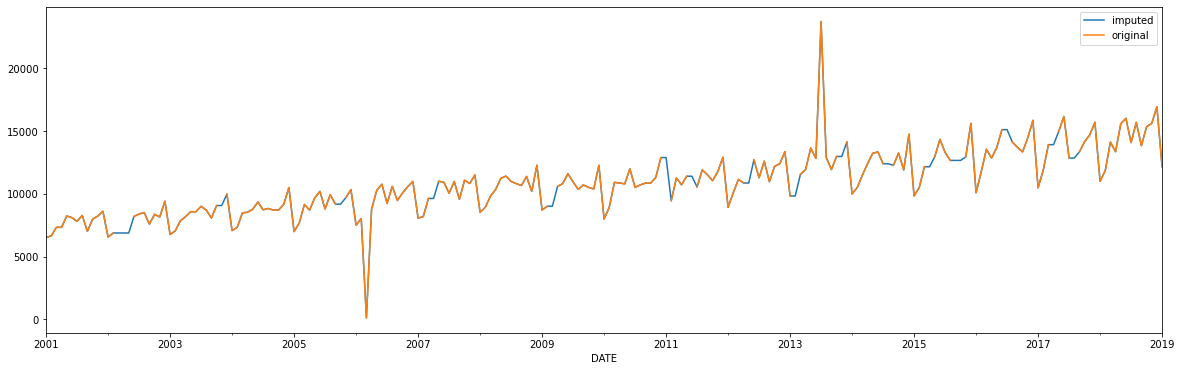

In [23]:
# Forward Fill 
# df.ffill().plot()

df.ffill()["Sales"].plot(label='imputed')
df["Sales"].plot(label='original')
plt.legend()



## Linear Interpolation : 

- It is a technique for handling the missing values.
- We take the average of the first point before and the first point after the missing value and fill the missing value with this average.


- Interpolation is an estimation of a value within two known values in a sequence of values.


- It ensures that the missing values are not under or over-estimated by taking the average of the entire data.


- After using the linear interpolation for the imputation of missing values in the above data, we get the following plot:


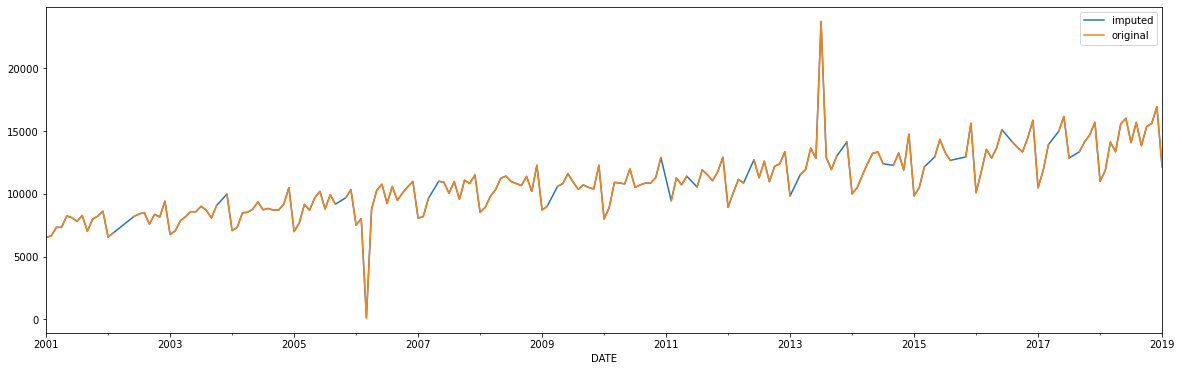

In [24]:
# interpolating missing values

df.interpolate(method="linear",limit_direction="forward")["Sales"].plot(label='imputed')
df["Sales"].plot(label='original')
plt.legend()



In [25]:
df = df.interpolate(method="linear",limit_direction="forward")
df 


,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0
...,...
2018-09-01,13838.0
2018-10-01,15351.0
2018-11-01,15615.0


<AxesSubplot:xlabel='DATE'>

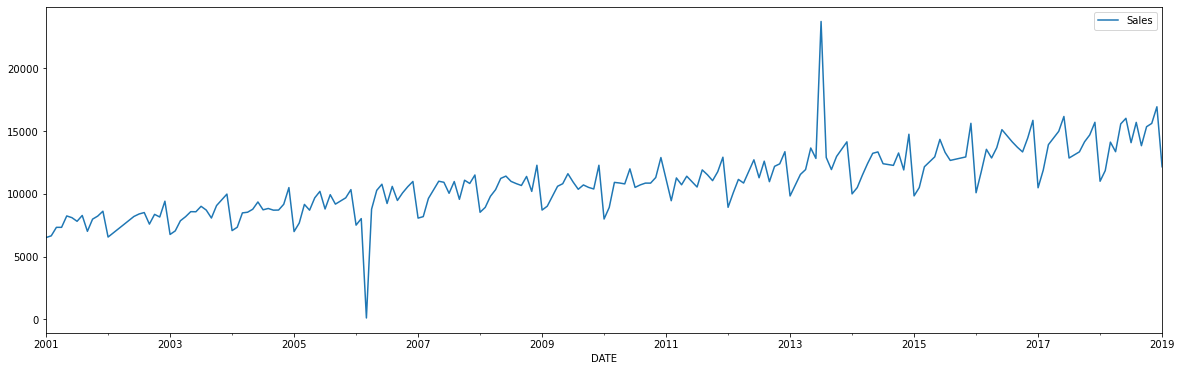

In [26]:
df.plot()

In [27]:
df.isna().sum()

Sales    0
dtype: int64

<AxesSubplot:xlabel='DATE'>

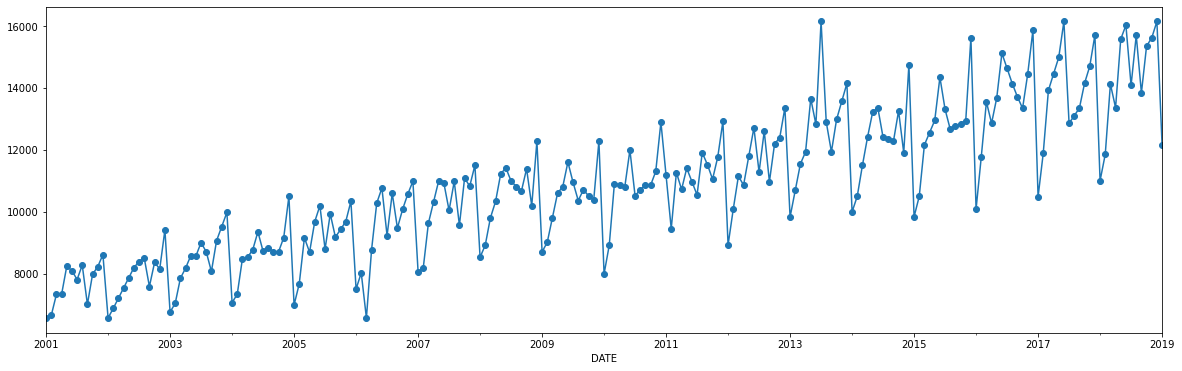

In [28]:
mobile_sales = pd.read_excel('mobilesales.xlsx')
mobile_sales.set_index('DATE', inplace=True)
mobile_sales.Sales = mobile_sales.Sales.interpolate()
mobile_sales.Sales = mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.99), lower=mobile_sales.Sales.quantile(0.01))
mobile_sales.Sales.plot(style='-o')

In [29]:
# df.plot(style="-o")

<AxesSubplot:xlabel='DATE'>

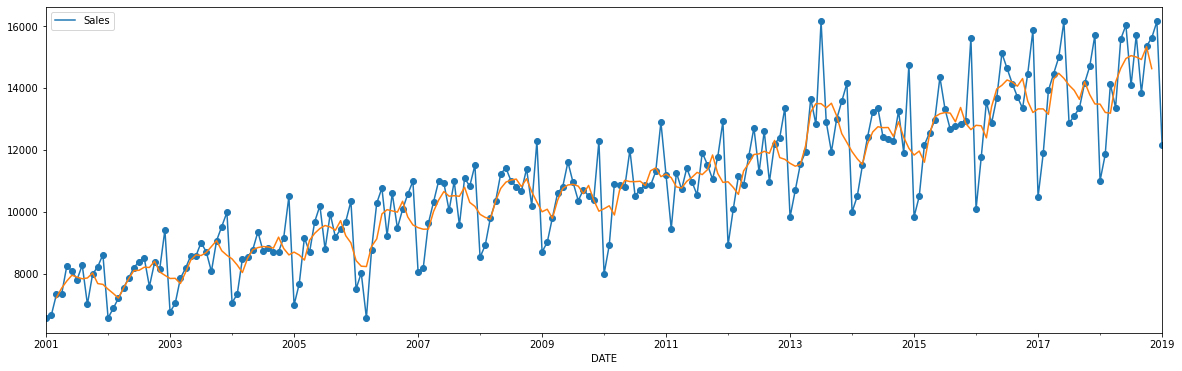

In [30]:
mobile_sales.plot(style="-o")
mobile_sales["Sales"].rolling(5,center=True).mean().plot()

## Moving Averages

- If we take the average of the last k data points in our series and use it to guess the next point at t=k. This approach is called the Moving Average.

i.e.

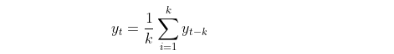                                    	

- The value of k acts as a hyperparameter, which we can set based on what works best for us. It is also called the window size.
- The moving average line has been shown below.



<AxesSubplot:xlabel='DATE'>

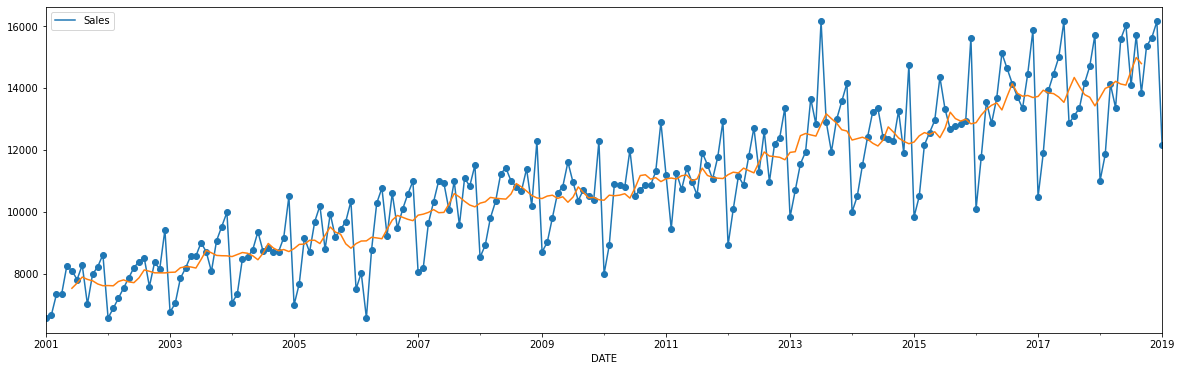

In [31]:
mobile_sales.plot(style="-o")
mobile_sales["Sales"].rolling(10,center=True).mean().plot()

<AxesSubplot:xlabel='DATE'>

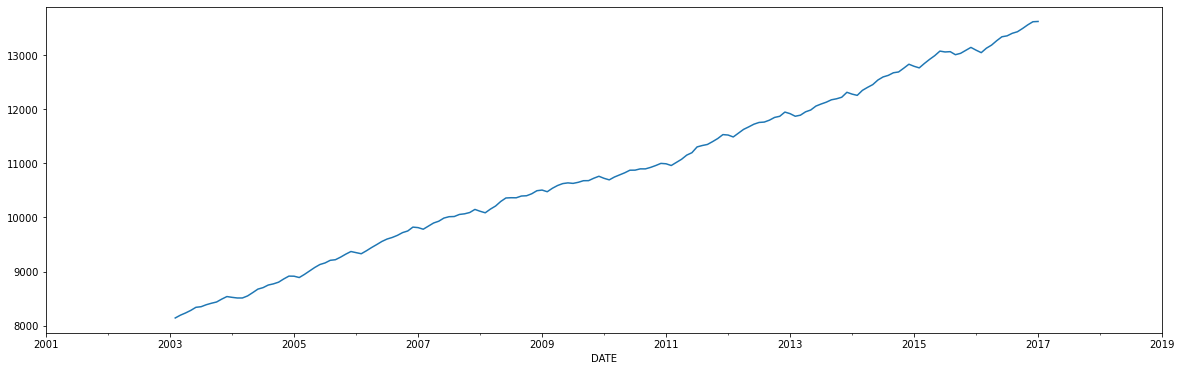

In [32]:
mobile_sales["Sales"].rolling(50,center=True).mean().plot()

<AxesSubplot:xlabel='DATE'>

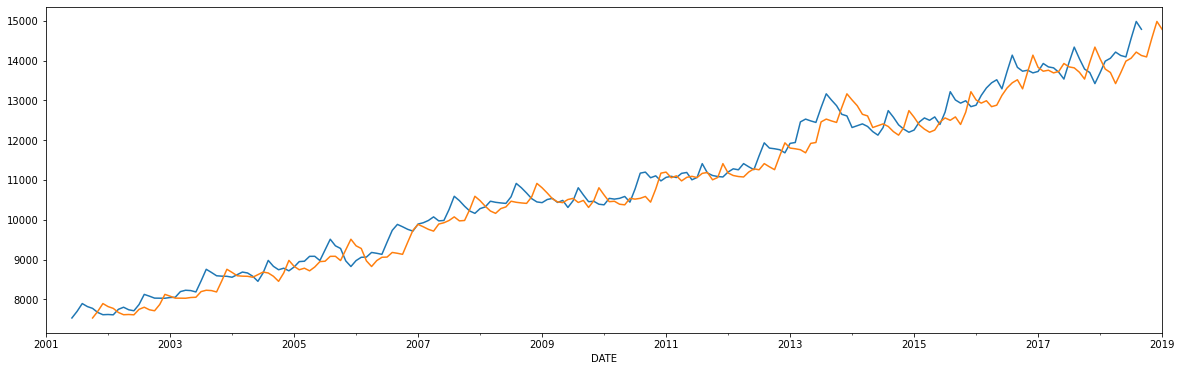

In [33]:
# centered moving average
mobile_sales["Sales"].rolling(10,center=True).mean().plot()
# forward moving average
mobile_sales["Sales"].rolling(10,center=False).mean().plot()

- Another important property of moving averages is that, when the time series goes up, the moving average also goes up and when the time series go down the moving average also goes down.


- Instead of giving all the previous observations equal weights, we can assign weights to the observations
- This is called the weighted moving average.

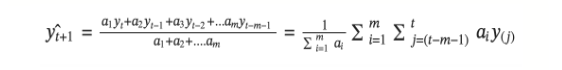


## Handling Anomalies 

- An anomaly/outlier is an abnormal or unusual data point in the data set, which stands out of the data. It can simply be seen as a wrong entry in the data, and that can happen at times.       


- Alternatively, it could be the correct entry but for a one-time event, which is not likely to repeat in the future. 
- So, even if it's valid data, we would like to remove it from our training set, because we don't want our model to get biased by that one-time event that is not going to happen again.

- Methods to remove anomalies:
    - Replace it with a fixed number
    - Using quantiles, which we will see now
    - Robust scaling is also a method that can be used.

- One of the best ways to identify the anomalies is by plotting a Histogram. 
- From the plot, we can clearly see the anomalies and we can easily decide where to cut the data, in order to get rid of anomalies.
- If the above histogram plot is more continuous, we use the concept of quantiles to deal with anomalies. We rule out observation as an anomaly if it is greater than 95 percentile, or less than 5 percentile.

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Sales', ylabel='Count'>

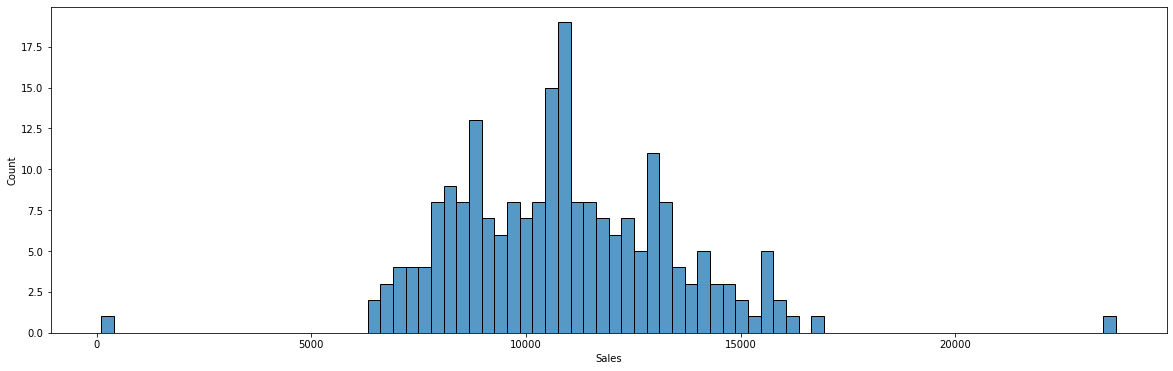

In [34]:
sns.histplot(df["Sales"],bins=80)

# Time series decomposition

- Graphs highlight the variety of patterns/ features in the time series.
- A time series can be split into several components, each representing one of the underlying categories of patterns.
- There are three important components which we want to decompose our signal into.
    - Trend - general movement over time
    - Seasonality -  behaviors captured in individual seasonal periods
    - Residual - everything not captured by trend and seasonal components
- Trend, Seasonality are the systematic components of the time series data whereas Residual/ Error is an irregular component.


### Trend
- Trend can be thought of as the linear increasing or decreasing behavior of the series over a long period of time. 
- The trend usually happens for some time and then disappears, it does not repeat.
- A trend can be uptrend, downtrend, or can be up and down, need not be a straight line.


- Trend line is a smooth predictable function that traces the trend of a time series, and can help us predict the time series indefinitely in the future.

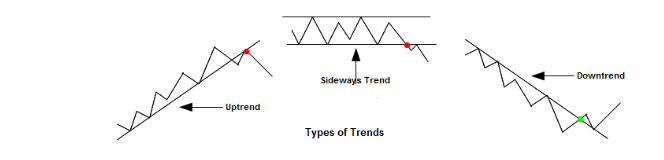



- Trend can be calculated by taking the rolling average (or moving average) over a long period of time or by just fitting a Linear Regression line on the points.


### Seasonality

- Seasonality in time-series data refers to a pattern that occurs at a regular interval.

- Making copies of seasonality can fetch us our time series.
- A seasonal pattern occurs when a time series is affected by seasonal factors such as the time of the year or the day of the week.
- The steps for calculating the seasonality are:
    - Calculate the trend and subtract it from the original time series.
    - From the result, take the average across the period. If it is a monthly time series for 4 years, then you have 4 Jan, 4 Feb, 4 Dec, etc. Take the avg of all Jans, Febs, etc.
    
- A yearly series does not have seasonality.
- The signal can have multiple seasonalities one can be short-term seasonality and one can be long-term seasonality.

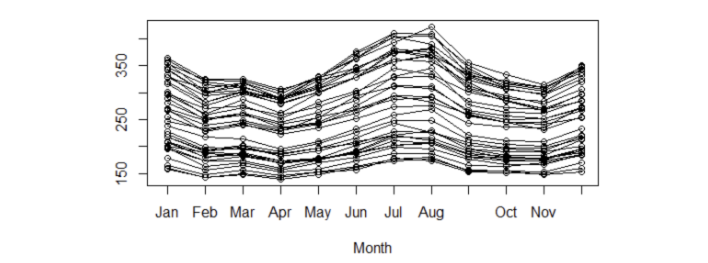

### Irregular Component

- It is the random fluctuation in the time series data that the above components(i.e, trend and seasonality) cannot explain. 
- This component is assumed to have a normal distribution with 0 mean and constant variance.
- This is also called Error/ White Noise/ Remainder.


# Components of time series : 

- Decomposition procedures are used in time series to describe the trend and seasonal factors in a time series. 
- More extensive decompositions might also include long-run cycles, holiday effects, day of week effects and so on. Here, we’ll consider trend and seasonal decompositions.


- One of the main objectives for a decomposition is to estimate seasonal effects that can be used to create and present seasonally adjusted values.
- A seasonally adjusted value removes the seasonal effect from a value so that trends can be seen more clearly.




#### Basic Structures

- The following two structures are considered for basic decomposition models:

##### Additive: 
- = Trend + Seasonal + Random(error)

##### Multiplicative: 
- = Trend * Seasonal * Random(error)

- The “Random” term is often called “Irregular” in software for decompositions.



######  How to Choose Between Additive and Multiplicative Decompositions
- The additive model is useful when the seasonal variation is relatively constant over time.
- The multiplicative model is useful when the seasonal variation increases over time.

##### Example : 

- we looked at quarterly beer production in Australia. 
- The seasonal variation looked to be about the same magnitude across time, so an additive decomposition might be good. Here’s the time series plot:
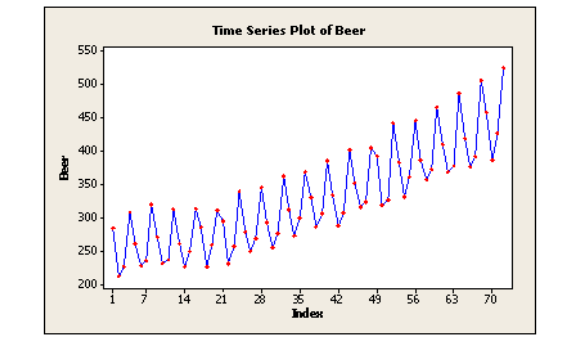

##### Example : 
- the quarterly earnings data for the Johnson and Johnson Corporations. 
- The seasonal variation increases as we move across time.
- A multiplicative decomposition could be useful. Here’s the plot of the data:
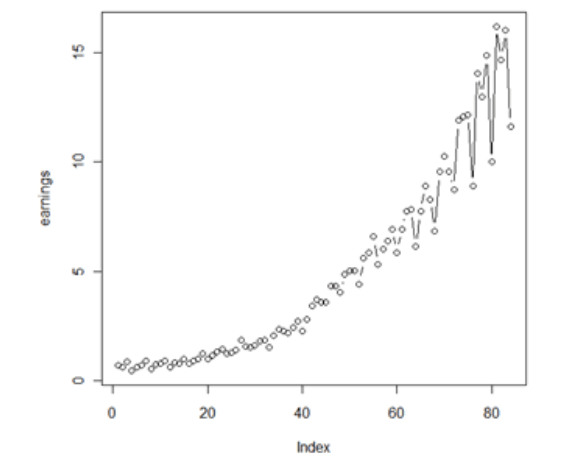

<AxesSubplot:xlabel='DATE'>

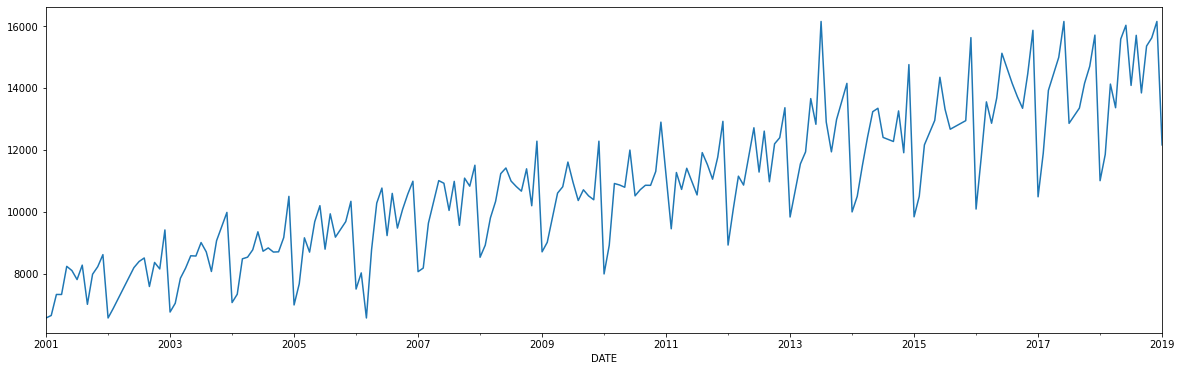

In [35]:
mobile_sales["Sales"].plot()

<AxesSubplot:xlabel='DATE'>

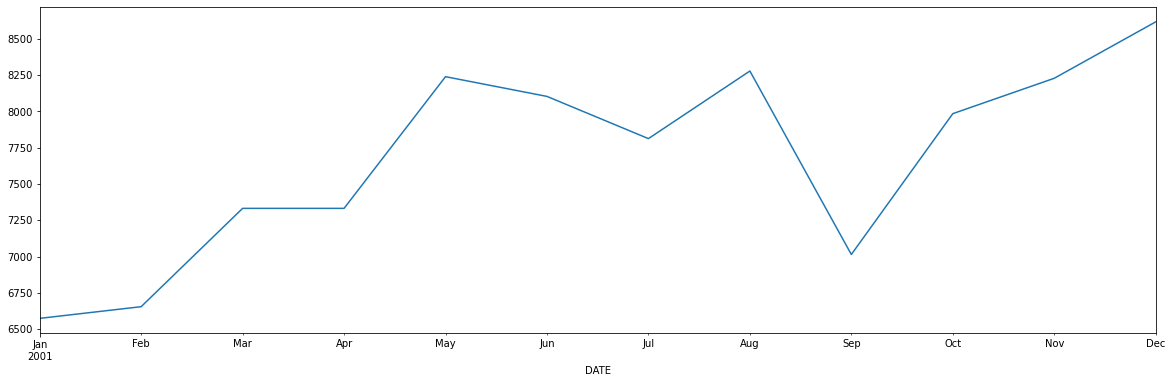

In [36]:
mobile_sales["Sales"][0:12].plot()

<AxesSubplot:xlabel='DATE'>

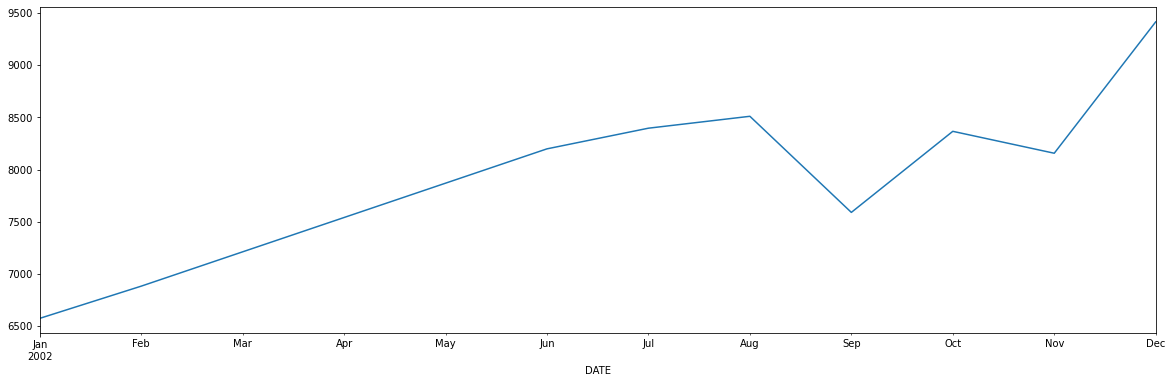

In [37]:
mobile_sales["Sales"][12:24].plot()

<AxesSubplot:xlabel='DATE'>

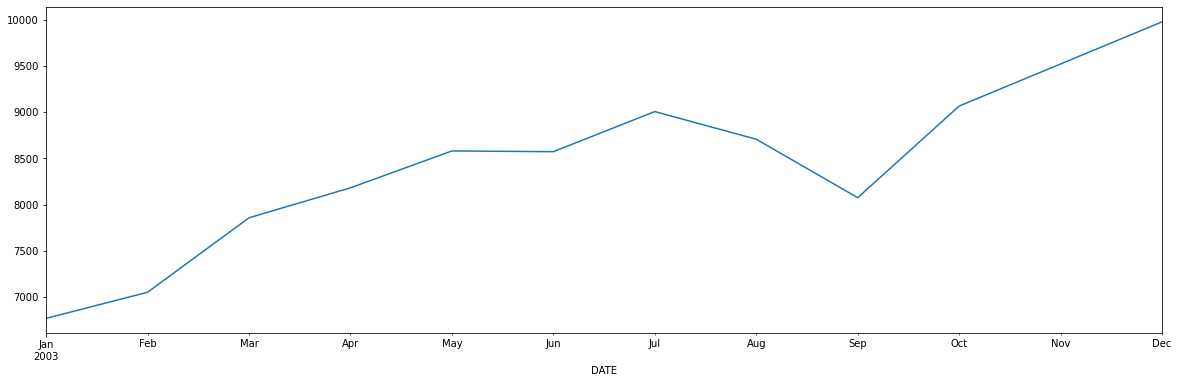

In [38]:
mobile_sales["Sales"][24:36].plot()

<AxesSubplot:xlabel='DATE'>

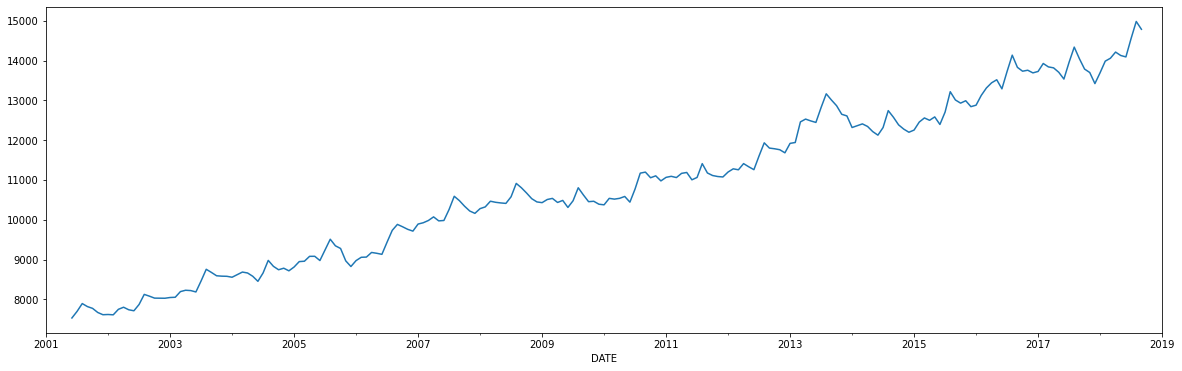

In [39]:
mobile_sales["Sales"].rolling(10,center=True).mean().plot()

##### additive model

In [40]:
import statsmodels.api as sm

In [41]:
model = sm.tsa.seasonal_decompose(mobile_sales["Sales"],model  = "additive")

In [42]:
model.nobs

(217,)

In [43]:
plt.rcParams['figure.figsize'] = (20, 15)
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
plt.rc('axes', labelsize=20)

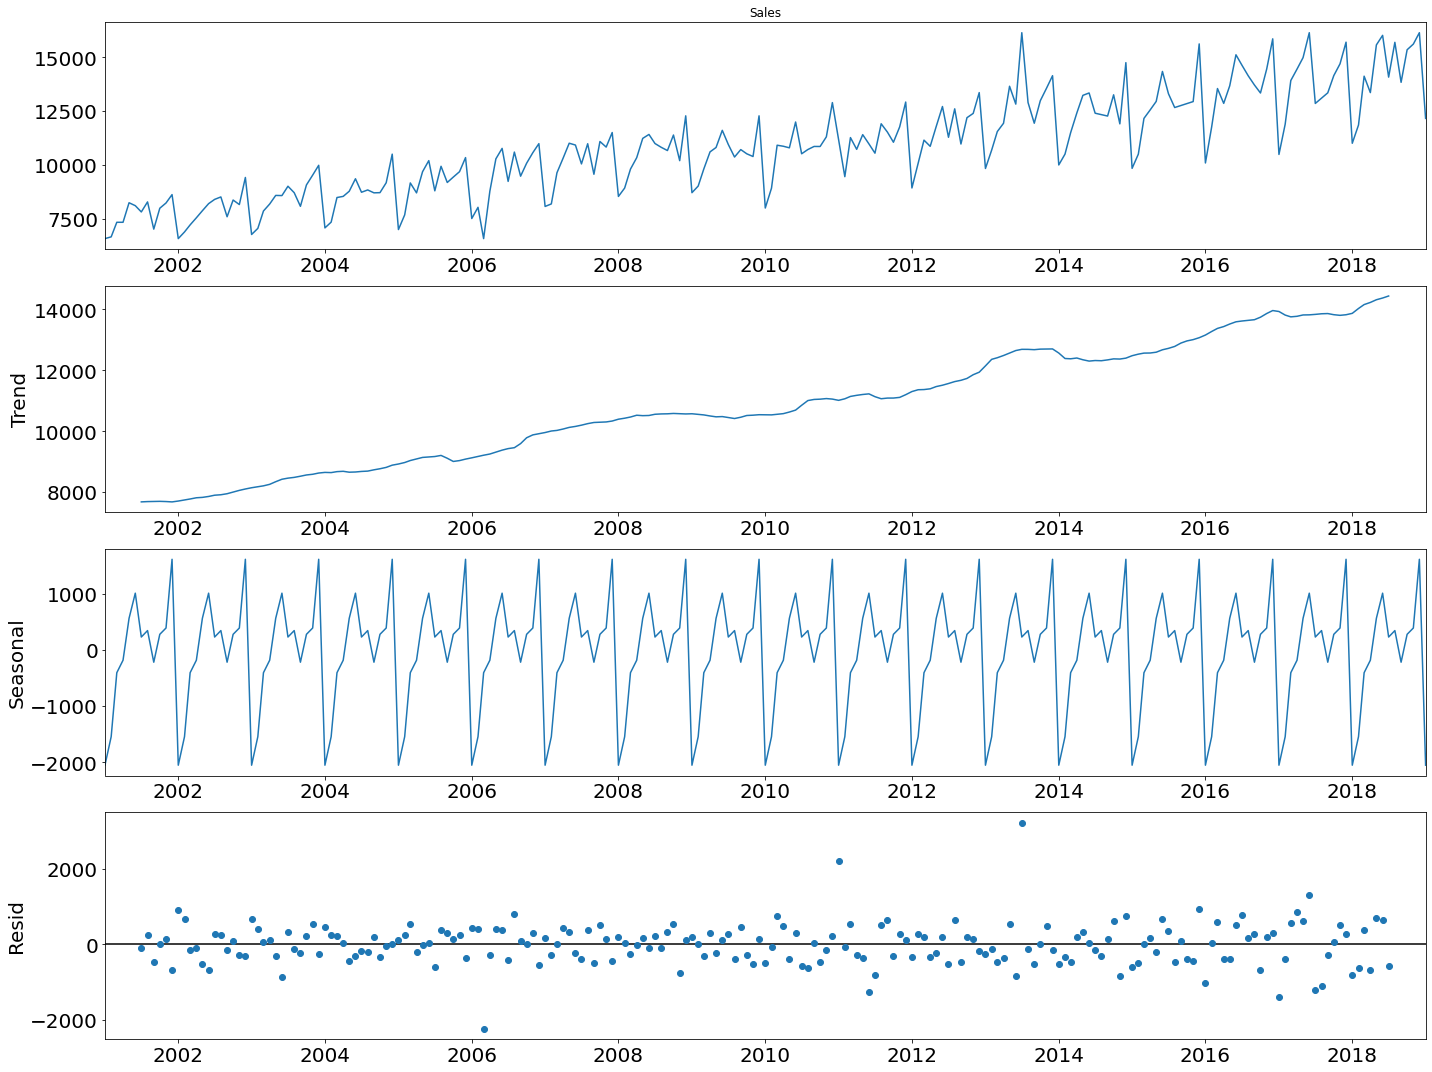

In [44]:
model.plot();
plt.show()

    y_hat(t) = trend(t)  +seasonality(t) + residual(t)
           
             = b(t) + S(t) + e(t)

        Errors : 
        
        e(t) = y(t) - b(t) - S(t)
        
        
        Error plot is a scatter plot : 
        as residual doesnt really depends on time. 
        its random. 
        
        Ideally its just a noise, it has nothing to do with time 
       

    -  if the residual plot , shows increasing with time , 
    it has a multiplicative seasonality. 
    

##### Additive: 
- = Trend + Seasonal + Residuals(error)

##### Multiplicative: 
- = Trend * Seasonal * Residuals(error)

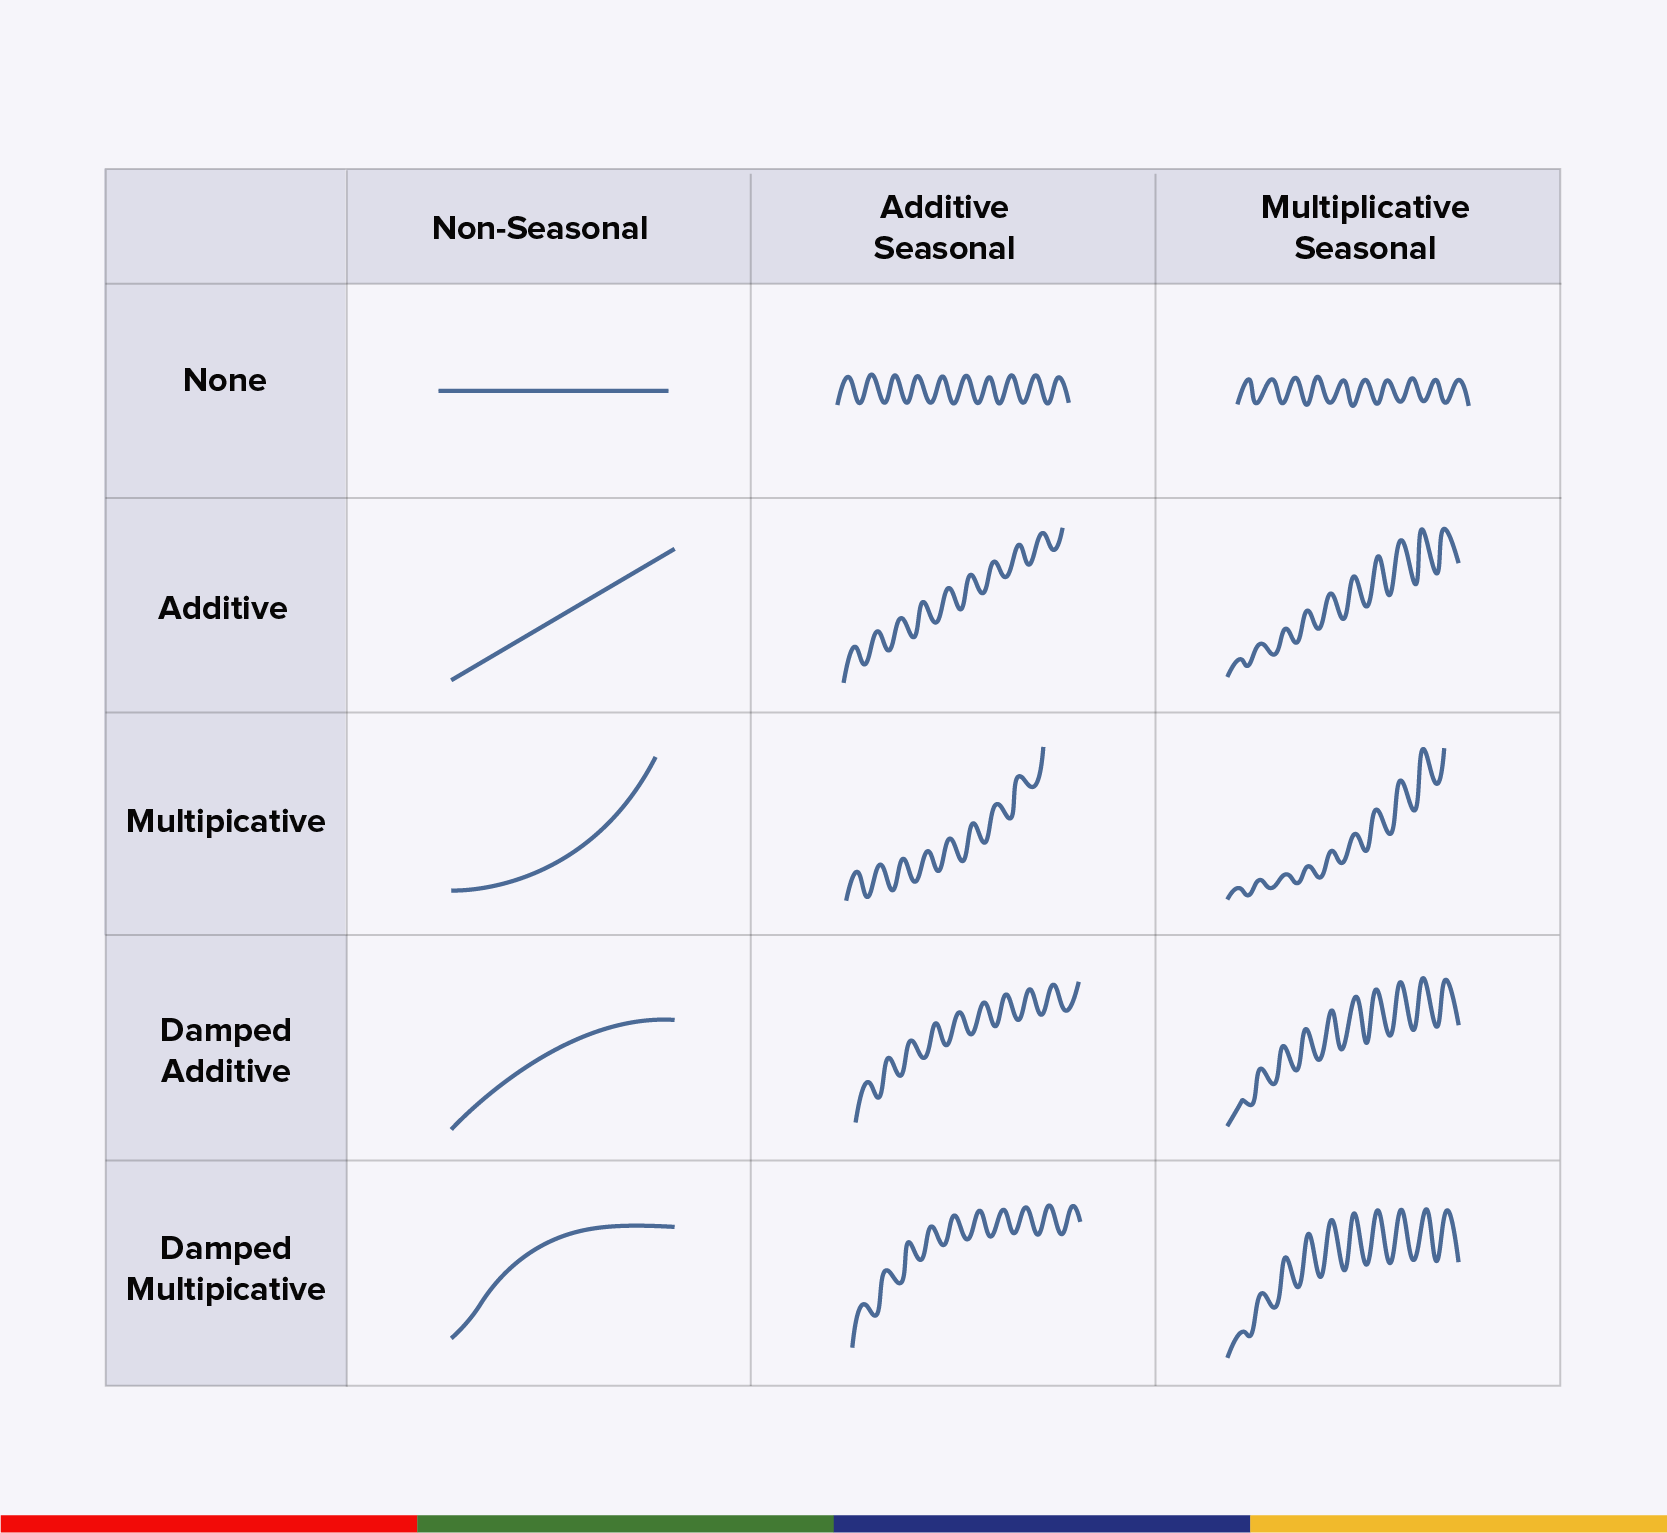

##### seasonality

<AxesSubplot:xlabel='DATE'>

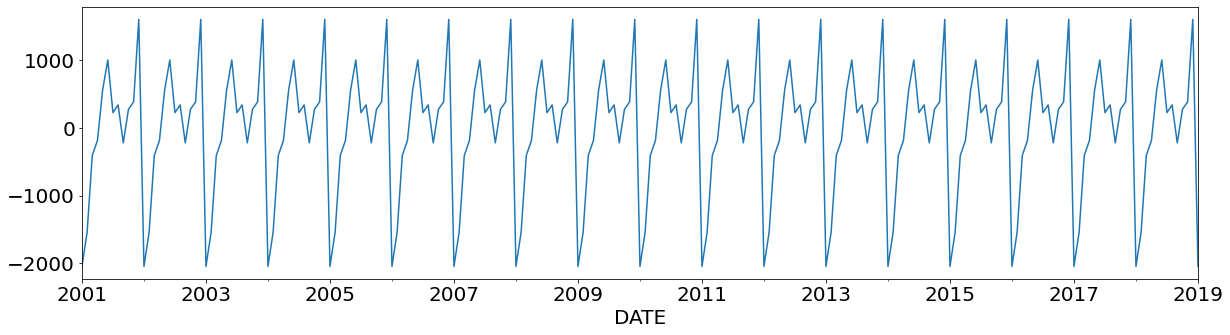

In [45]:
plt.rcParams['figure.figsize'] = (20, 5)

model.seasonal.plot()

##### trend

<AxesSubplot:xlabel='DATE'>

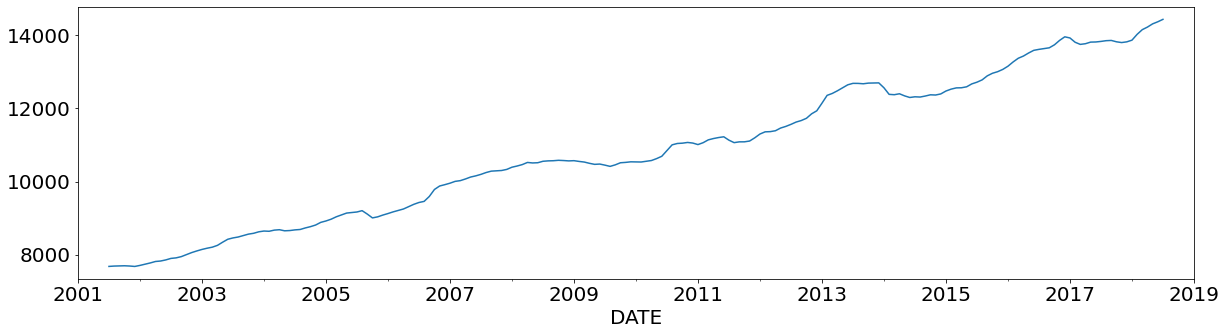

In [46]:
plt.rcParams['figure.figsize'] = (20, 5)

model.trend.plot()

##### residuals

<AxesSubplot:xlabel='DATE'>

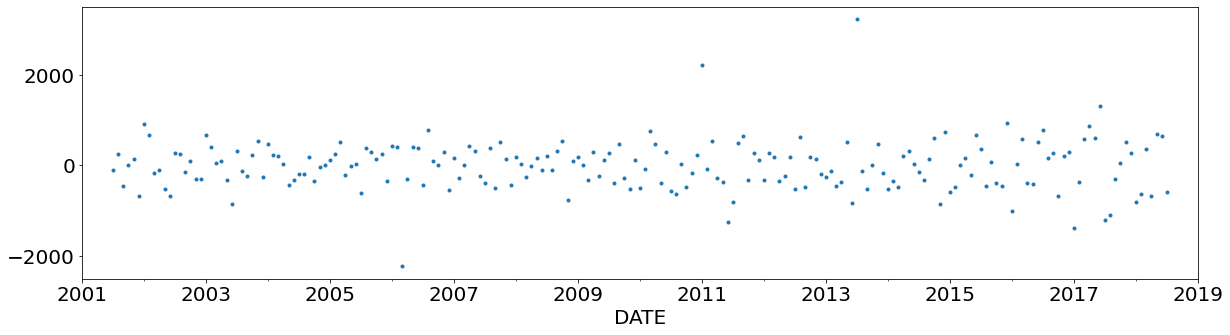

In [47]:
plt.rcParams['figure.figsize'] = (20, 5)

model.resid.plot(style=".")

In [48]:
(model.resid**2).mean()**0.5  # RMSE

551.2232849558569

##### multiplicative model

    y_hat(t) = seasonality(t) * tred(t) * residuals(t)

In [49]:
model = sm.tsa.seasonal_decompose(mobile_sales["Sales"],model  = "multiplicative")

In [50]:
plt.rcParams['figure.figsize'] = (20, 15)
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
plt.rc('axes', labelsize=20)

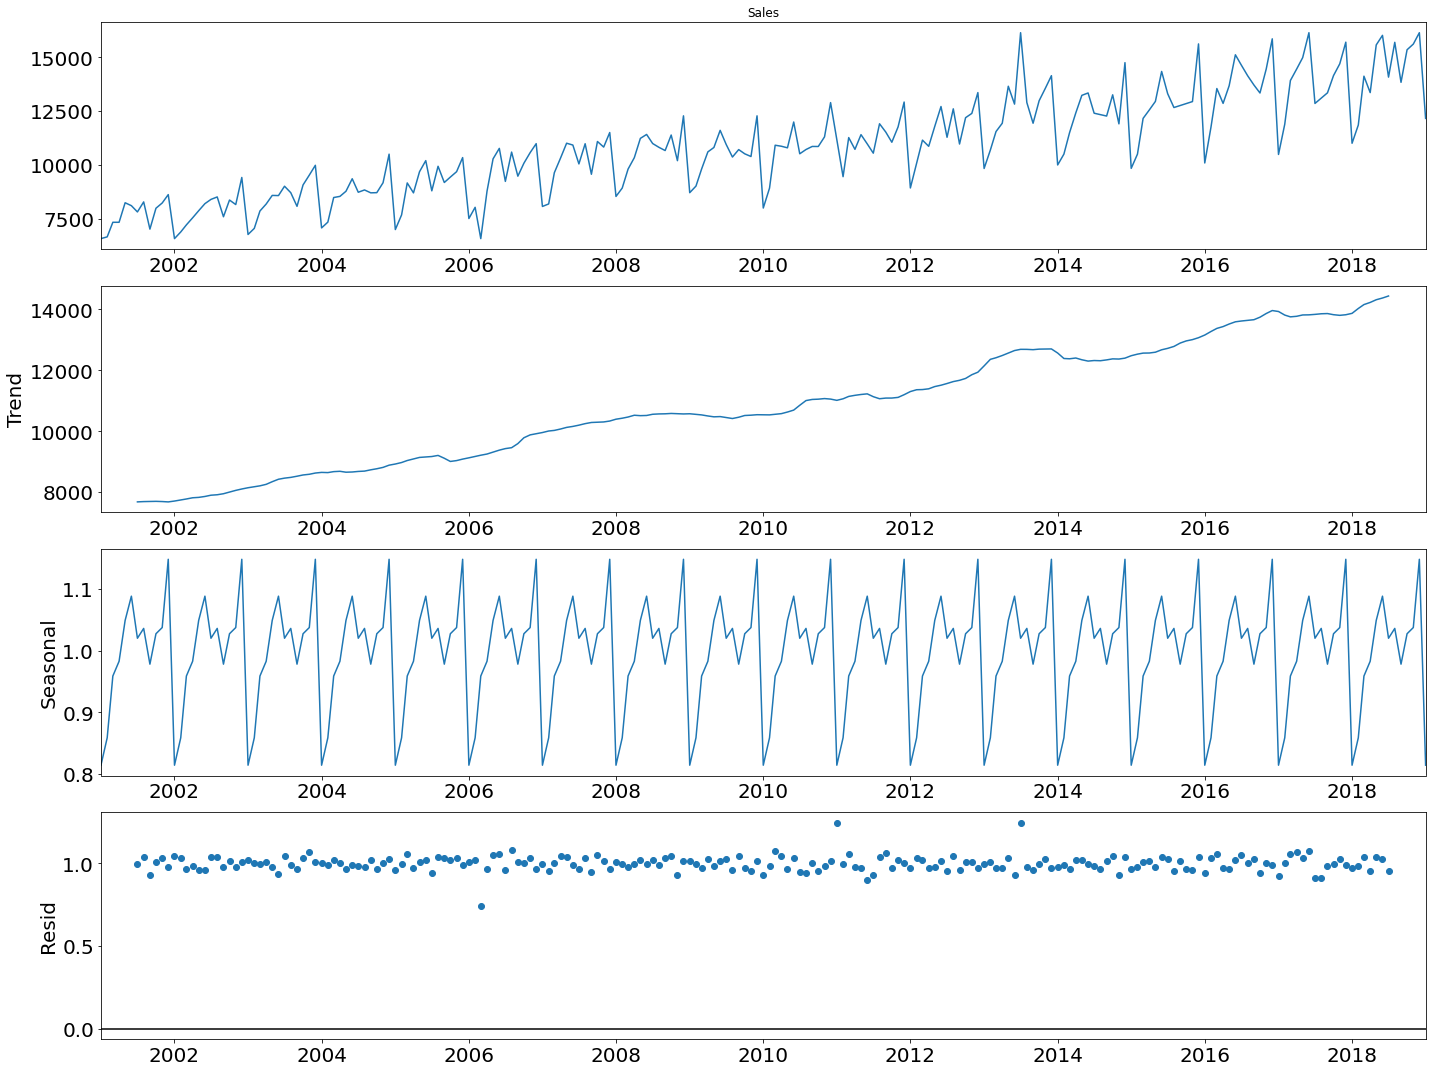

In [51]:
model.plot();
plt.show()

In [52]:
(model.resid**2).mean()**0.5  # Multiplicative residual RMSE

1.0008306586459996

In [53]:
model = sm.tsa.seasonal_decompose(mobile_sales["Sales"],model  = "additive")


# Decomposition from Scratch : 

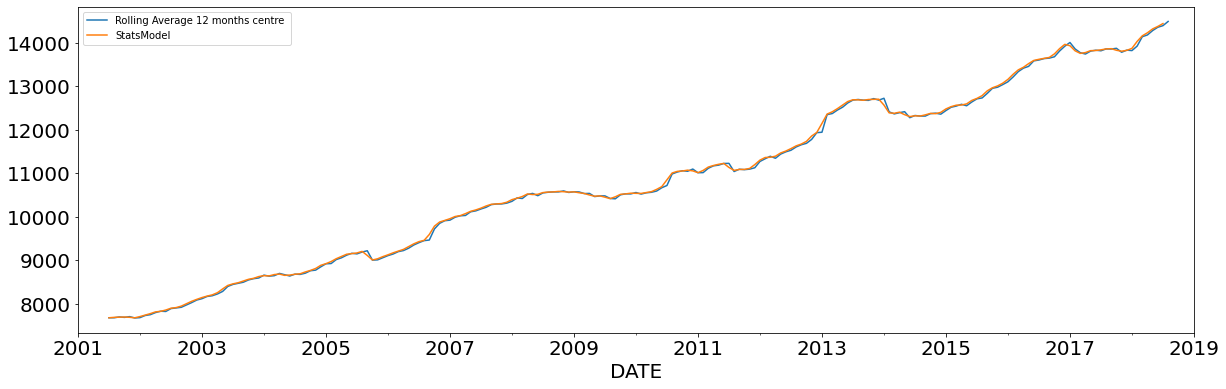

In [54]:
plt.rcParams['figure.figsize'] = (20, 6)

mobile_sales["Sales"].rolling(12,center=True).mean().plot(label="Rolling Average 12 months centre ")
model.trend.plot(label="StatsModel")
plt.legend()
plt.show()

<AxesSubplot:xlabel='DATE'>

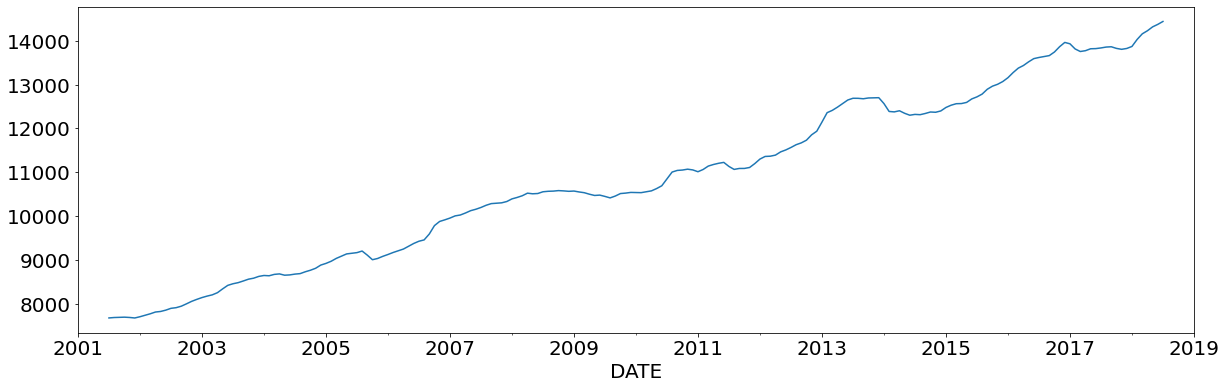

In [55]:
model.trend.plot()

### de-trended time series plot

In [56]:
#  time series plot : 
# removing the rolling average data from original data 

<AxesSubplot:xlabel='DATE'>

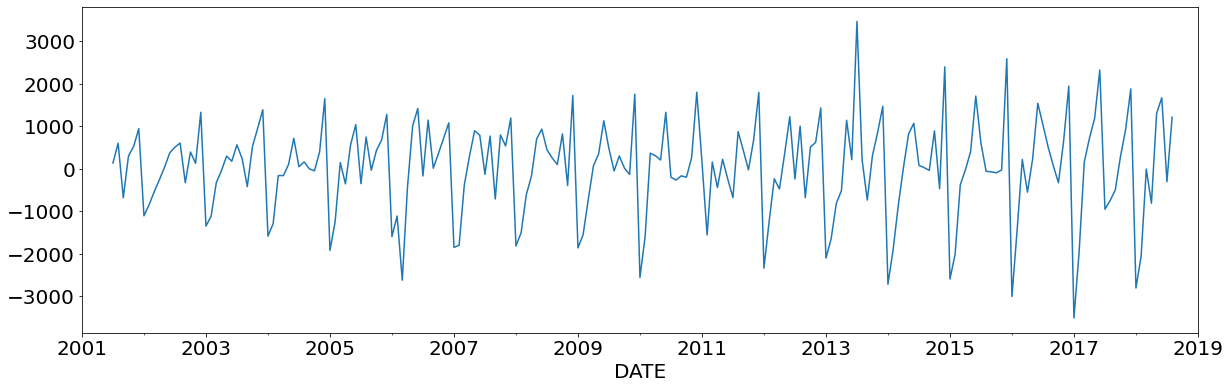

In [57]:
trend = mobile_sales["Sales"].rolling(12, center=True).mean()
detrended_ts =  (mobile_sales["Sales"] - trend)
detrended_ts.plot()

In [58]:
detrended_ts = detrended_ts.reset_index()

In [59]:
# detrended_ts.groupby(detrended_ts["DATE"].dt.month)["Sales"].transform("mean").head(20)

<AxesSubplot:>

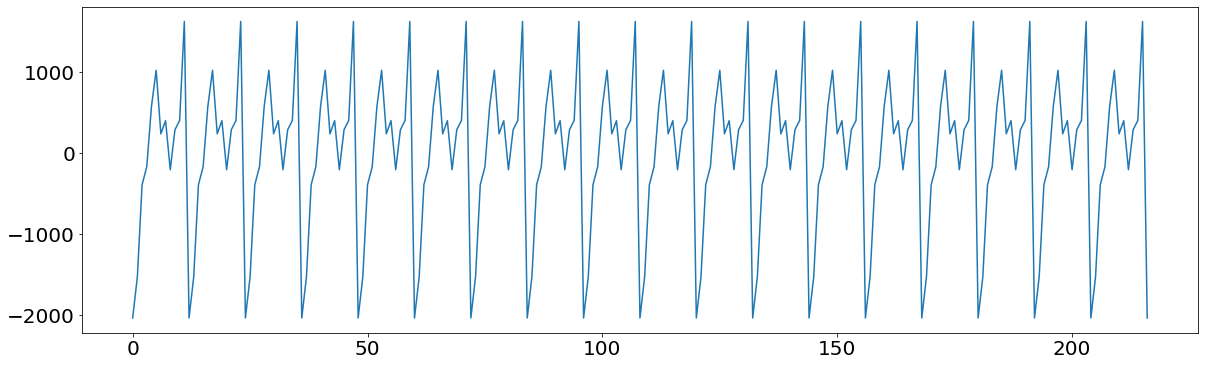

In [60]:
detrended_ts.groupby(detrended_ts["DATE"].dt.month)["Sales"].transform("mean").plot()

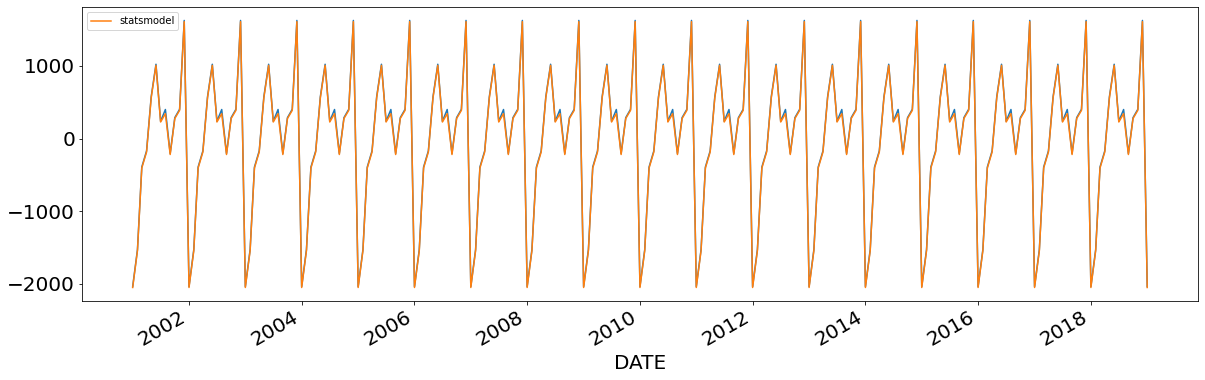

In [61]:
plt.plot(detrended_ts["DATE"],detrended_ts.groupby(detrended_ts["DATE"].dt.month)["Sales"].transform("mean"))

model.seasonal.plot(label="statsmodel")
plt.legend()
plt.show()

In [62]:
seasonality = detrended_ts.groupby(detrended_ts["DATE"].dt.month)["Sales"].transform("mean")

<AxesSubplot:>

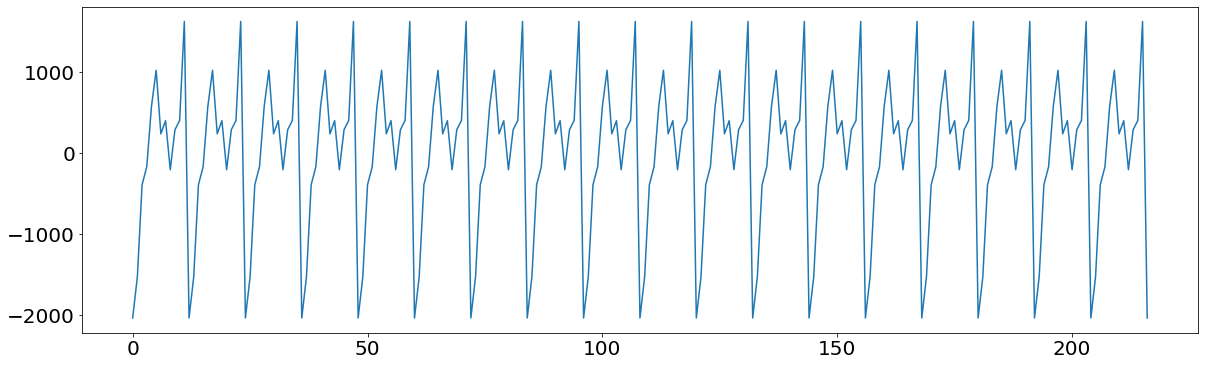

In [63]:
seasonality.plot()

In [64]:
#final every month seasonality

<AxesSubplot:xlabel='DATE'>

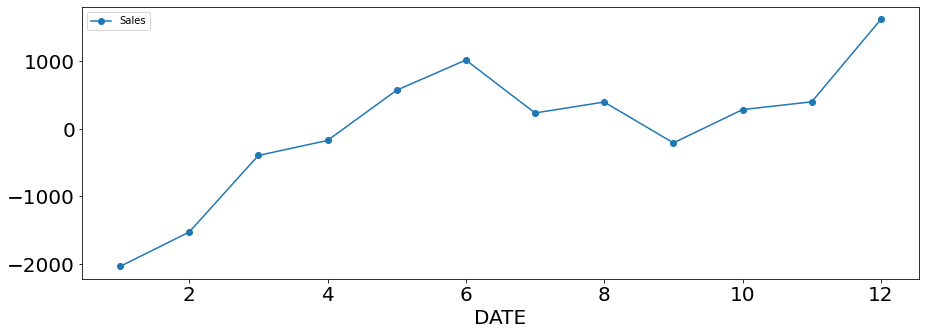

In [65]:
plt.rcParams['figure.figsize'] = (15,5)

detrended_ts.groupby(detrended_ts["DATE"].dt.month).mean().plot(style="-o")


In [66]:
# iterative process for final trend : 

<AxesSubplot:xlabel='DATE'>

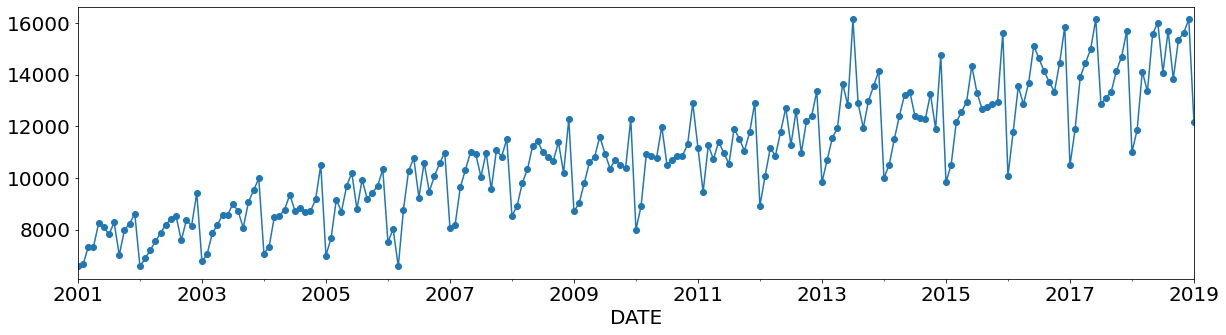

In [67]:
raw_ts = mobile_sales["Sales"]
plt.rcParams['figure.figsize'] = (20,5)

raw_ts.plot(style="-o")

<AxesSubplot:xlabel='DATE'>

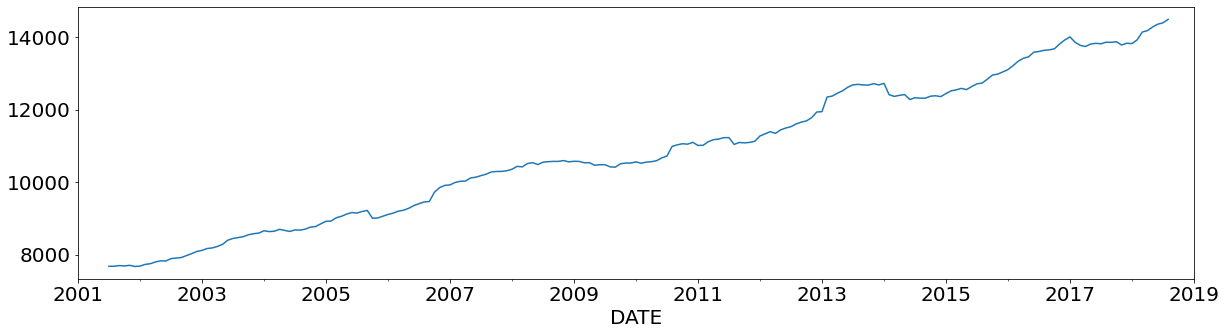

In [68]:
temporary_trend = raw_ts.rolling(window=12,center = True).mean()
temporary_trend.plot()


<AxesSubplot:xlabel='DATE'>

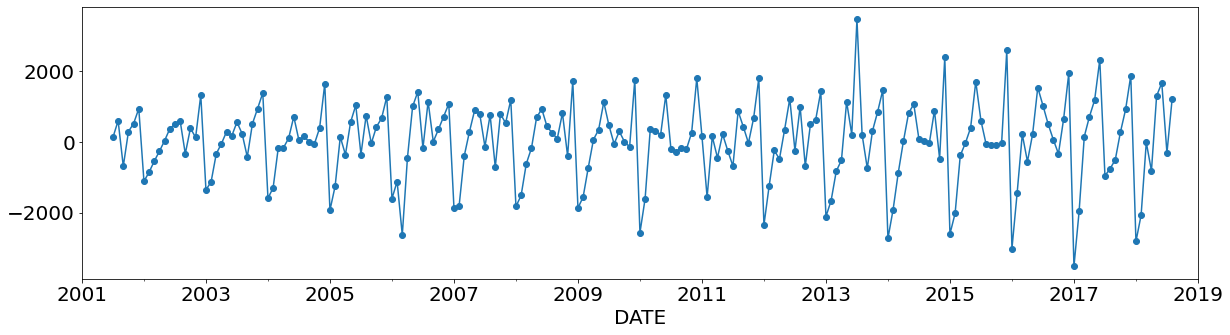

In [69]:
seasonality = (raw_ts - temporary_trend)
seasonality.plot(style="-o")

<AxesSubplot:xlabel='DATE'>

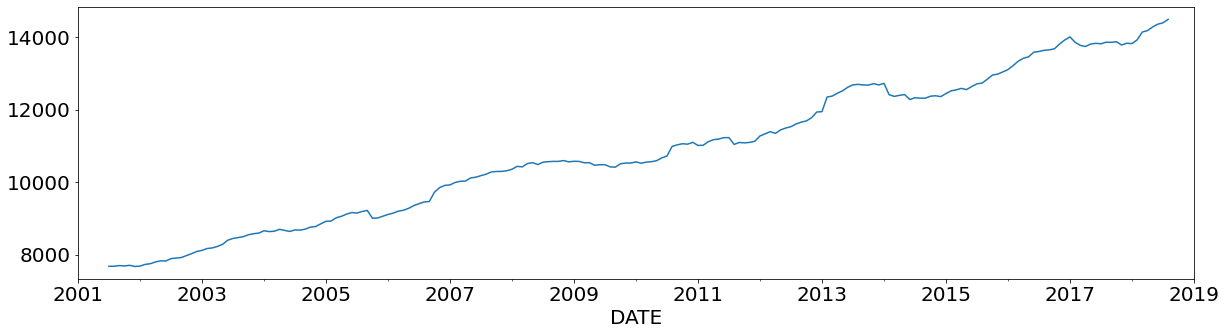

In [70]:
de_seasonality = raw_ts - seasonality  #de-seasonal_timeseries
de_seasonality.plot()

<AxesSubplot:xlabel='DATE'>

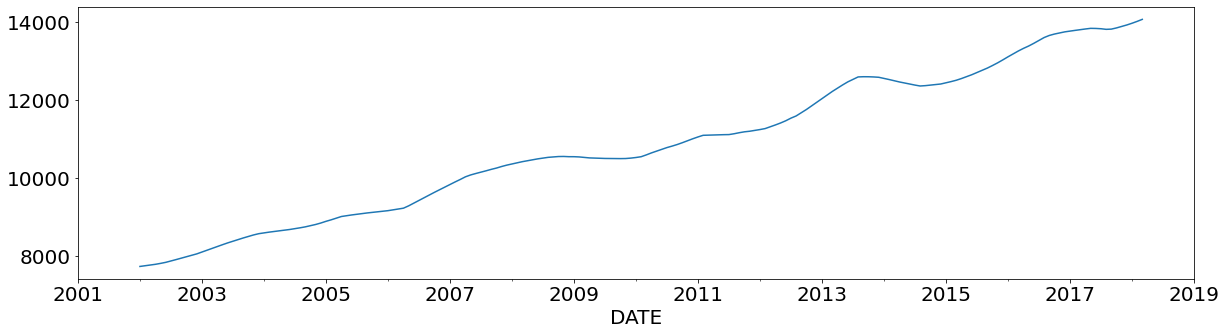

In [71]:
final_trend  = de_seasonality.rolling(window=12,center = True).mean()
final_trend.plot()

<AxesSubplot:xlabel='DATE'>

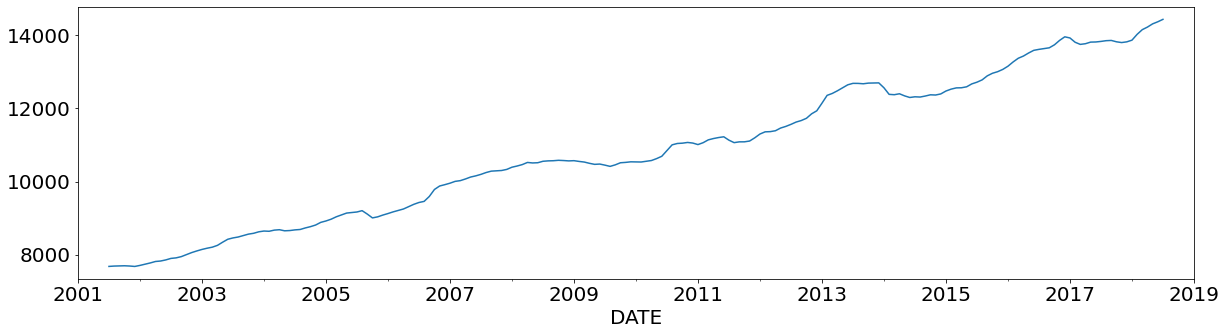

In [72]:
model.trend.plot()

<AxesSubplot:xlabel='DATE'>

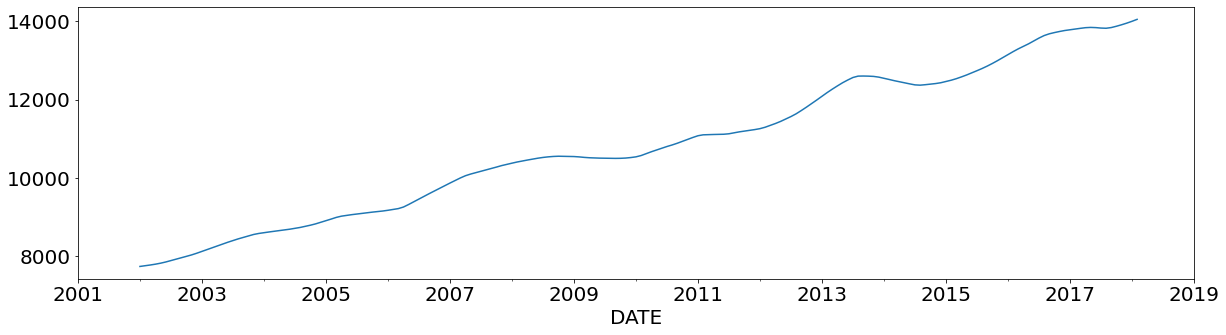

In [73]:
model.trend.rolling(window=12,center = True).mean().plot()

# Simple Forecasting Method :

In [74]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae, 
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3)) 
    print('MAPE:', round(mape(actual, predicted), 3))

In [75]:
mobile_sales.index[-12]

Timestamp('2018-02-01 00:00:00')

In [76]:
X_train = mobile_sales.loc[mobile_sales.index < mobile_sales.index[-12] ].copy()
X_test = mobile_sales.loc[mobile_sales.index >= mobile_sales.index[-12] ].copy()


In [77]:
# X_train

In [78]:
# X_test

### Naïve Method : 

In [79]:
X_test["predicted"] = X_train["Sales"][-1]

<AxesSubplot:xlabel='DATE'>

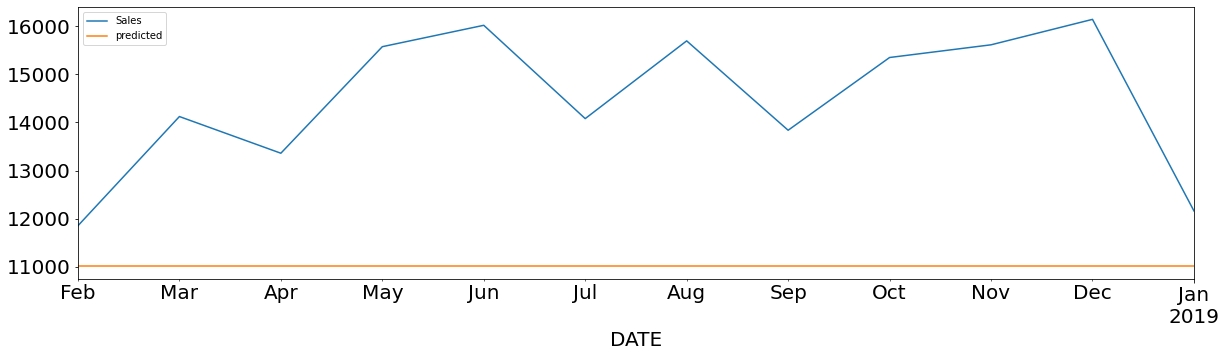

In [80]:
X_test.plot()

In [81]:
performance(X_test["Sales"],X_test["predicted"])

MAE : 3479.79
RMSE : 3757.483
MAPE: 0.232


In [82]:
# 23% error in forecasting


In [83]:
X_test = mobile_sales.loc[mobile_sales.index >= mobile_sales.index[-12] ].copy()



### Seasonal Naive Method : 

In [84]:
# repeat the last year seasonality 
X_test.index 

DatetimeIndex(['2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
               '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
               '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', freq=None)

In [85]:
X_train.loc[(X_test.index - pd.DateOffset(years= 1))].Sales.values

array([11891.  , 13921.  , 14453.5 , 14986.  , 16144.48, 12856.  ,
       13102.5 , 13349.  , 14150.  , 14698.  , 15704.  , 11005.  ])

In [86]:
X_test["pred"]= X_train.loc[(X_test.index - pd.DateOffset(years= 1))].Sales.values

<AxesSubplot:xlabel='DATE'>

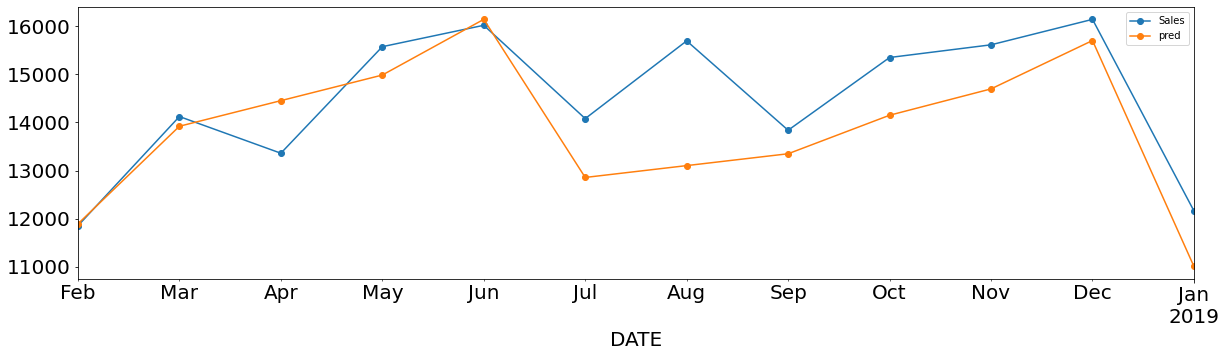

In [87]:
X_test.plot(style='-o')



In [88]:
performance(X_test["Sales"],X_test["pred"])

MAE : 839.08
RMSE : 1075.542
MAPE: 0.058



### Drift Method : 

In [89]:
y_t = X_train["Sales"][-1]  # last value in training set 
y_t

11005.0

In [90]:
y_0 = X_train["Sales"][0]  # first value in training set
y_0

6573.36

In [91]:
slope = (y_t - y_0) / len(X_train["Sales"])

In [92]:
len(X_test)-1

11

In [93]:
len(X_test)

12

In [94]:
h = np.linspace(0,len(X_test)-1,len(X_test))
h

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [95]:
X_test["pred"] = y_t + (slope*h )

<AxesSubplot:xlabel='DATE'>

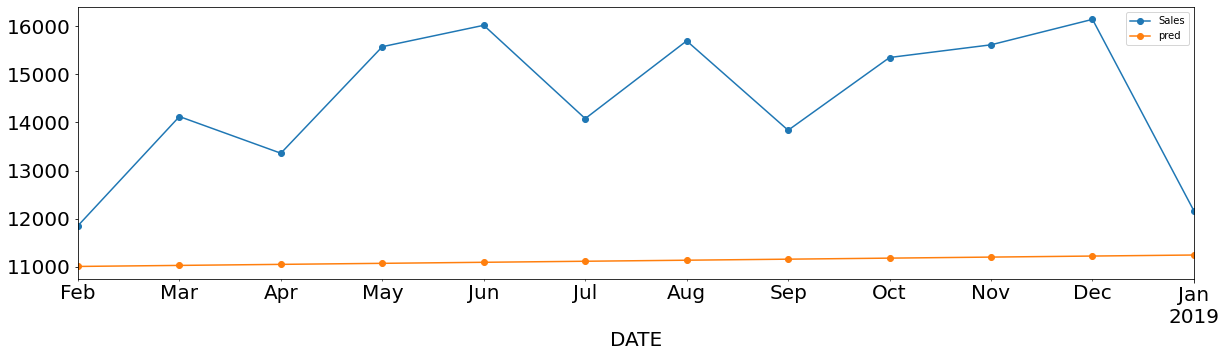

In [96]:
X_test.plot(style='-o')


In [97]:
performance(X_test["Sales"],X_test["pred"])

MAE : 3360.892
RMSE : 3640.673
MAPE: 0.224


### Moving Average : 

In [98]:
# train_x.Sales.dropna().copy().values

In [99]:
pred_ = X_train.Sales.dropna().copy().values

for i in range(12):
    pred_ = np.append(pred_, pred_[-3:].mean())

In [100]:
X_test['pred'] = pred_[-12:]

MAE : 1738.024
RMSE : 1940.885
MAPE: 0.117


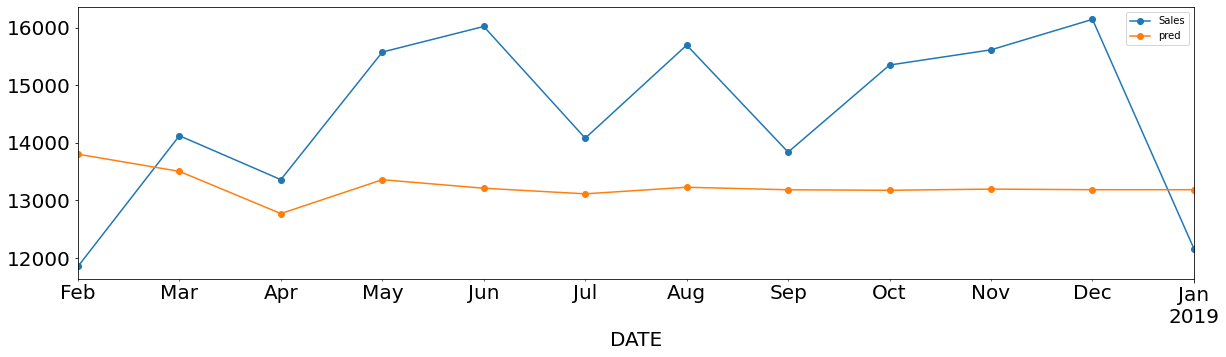

In [101]:
X_test.plot(style='-o')

performance(X_test['Sales'], X_test['pred'])

    Naive Idea says : recent values is important 
    Moving average or mean says : overall mean (history) is important
    
    
    average model : 
    
    
    Y^t+1 = Yt + Yt-1 + Yt-2 + .... + Y1 + Y0
             ----------------------------------
                           t
                           
    =  (1/t * Yt) + (1/t * Yt-1) + (1/t * Yt-2)+ ... + (1/t * Y1) + (1/t * Y0)
    
    # equal weight to all the past values 
    
    but the more weight should be given to the recent values
    thats called weighted average . 
    
    

# Smoothing-based methods


## Exponential Smoothing 


- The exponential smoothing technique is a weighted moving average procedure where the exponential decline of weights happens as the data becomes older.


- More weightage is given to the recent observations and less weightage is given to the past/old observations.


- This method overcomes the shortcomings of the moving average method.
- The smoothing parameters control how fast the weights decay and these parameter values lie between 0 and 1.
- There are three types of exponential smoothing methods:
    - SES
    - DES
    - TES


## Simple Exponential Smoothing (SES) 

- The key idea of this method is to keep some memory of the entire time series, but also, we want to give more value to the recent data and less value to the past value. This forms a decaying trend.


- This method is used when there is no trend or seasonality present in the data.


- Let's consider the weight we assign to the recent most value be alfa
- alfa is called the smoothing parameter. 
- So, our forecast at time t for the time t+1 is:
    




- The above formulation is recursive in nature and expands in the following form:

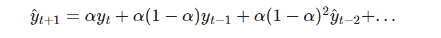

- We can observe from the formulation that the weights are exponentially decaying. Therefore, we give more weightage to the most recent values, and this weightage keeps decreasing for earlier values.

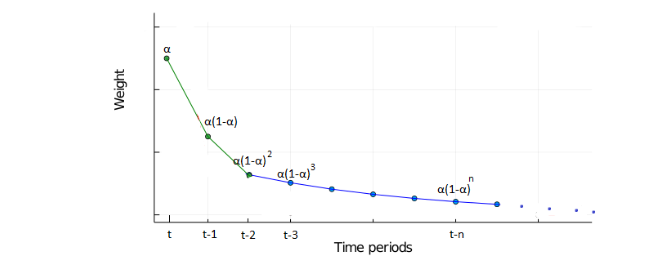

- The recommended starting value of  is:
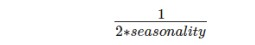

- Let’s fit the SES model on the sales data:

 

    - mean idea: history importance 
    - naive idea: recent is more relevant
    
    combine both idea: 
    
    
            y^t+1 = alfa*yt + (1-alfa)y^t
            
            y^t+1 = alfa*yt + (1-alfa)[alfa*yt-1 + (1-alfa)y^t-1]
            
            y^t+1 = alfa*yt + (1-alfa)[alfa*yt-1 + 
                                        (1-alfa)[alfa*yt-2 + (1-alfa)y^t-2]]
            
            
            y^t+1 = alfa*yt + alfa(1-alfa)yt-1  +  
                                     alfa(1-alfa)**2 * (yt-2)
                                      +  .... 
                                              + alfa(1-alfa)**t *(y^0)
                                    
            range_alfa (0,1)
    

    - when alfa is higher , close to 1 : 
            ~ we give more weightage to more recent values 
            ~ we are forgetting past data quickly. 
            past weightage should not be more relevant 

In [109]:
import warnings
warnings.filterwarnings("ignore")

In [110]:
model = sm.tsa.SimpleExpSmoothing(mobile_sales["Sales"])

_ = model.fit(smoothing_level = 0.8)
_.fittedvalues


DATE
2001-01-01     6618.038968
2001-02-01     6582.295794
2001-03-01     6639.659159
2001-04-01     7193.531832
2001-05-01     7304.306366
                  ...     
2018-09-01    15444.233816
2018-10-01    14159.246763
2018-11-01    15112.649353
2018-12-01    15514.529871
2019-01-01    16018.489974
Length: 217, dtype: float64

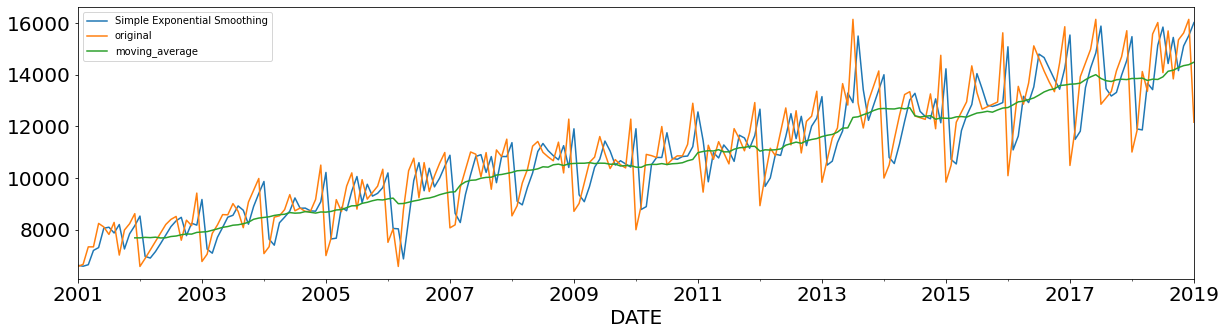

In [111]:
pred = pd.Series(sm.tsa.SimpleExpSmoothing(mobile_sales.Sales).fit(smoothing_level= 0.8 ).fittedvalues)

pred.plot(label='Simple Exponential Smoothing')
mobile_sales.Sales.plot(label='original')
mobile_sales.Sales.rolling(12).mean().plot(label='moving_average')
plt.legend()

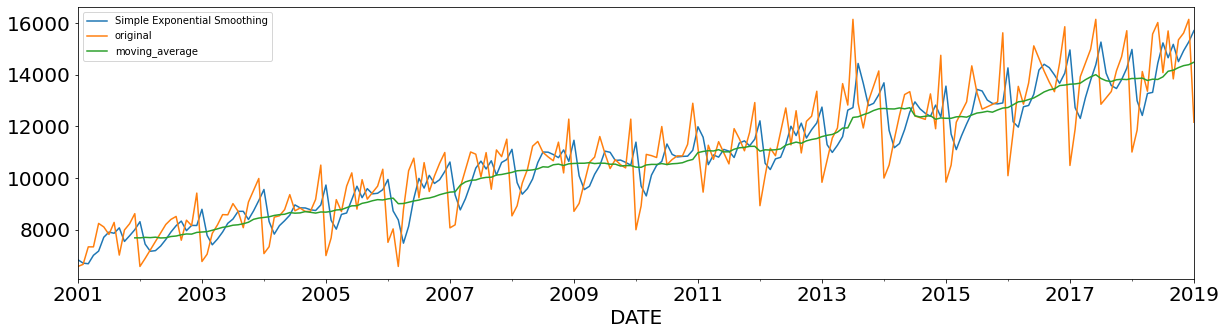

In [112]:
pred = pd.Series(sm.tsa.SimpleExpSmoothing(mobile_sales.Sales).fit(smoothing_level= 0.5 ).fittedvalues)

pred.plot(label='Simple Exponential Smoothing')
mobile_sales.Sales.plot(label='original')
mobile_sales.Sales.rolling(12).mean().plot(label='moving_average')
plt.legend()

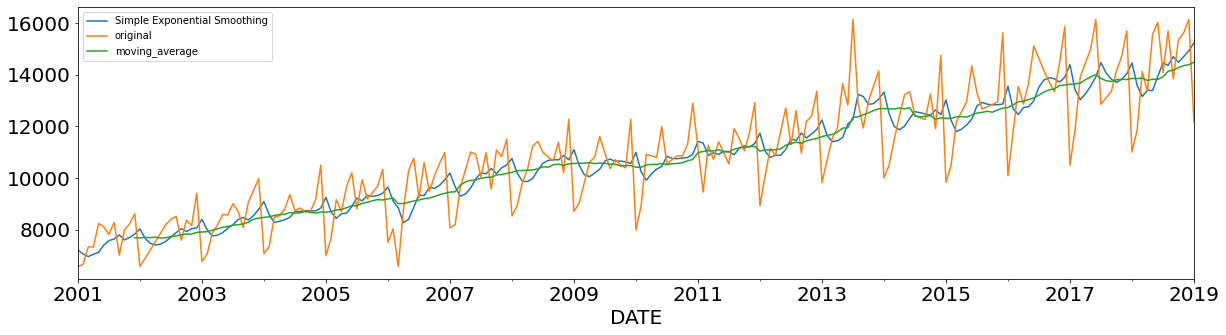

In [113]:
pred = pd.Series(sm.tsa.SimpleExpSmoothing(mobile_sales.Sales).fit(smoothing_level= 0.25 ).fittedvalues)

pred.plot(label='Simple Exponential Smoothing')
mobile_sales.Sales.plot(label='original')
mobile_sales.Sales.rolling(12).mean().plot(label='moving_average')
plt.legend()

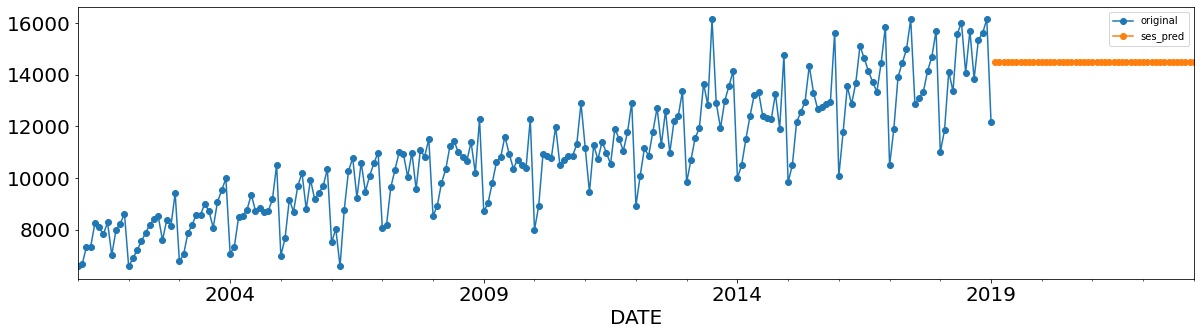

In [126]:
model = sm.tsa.SimpleExpSmoothing(mobile_sales.Sales).fit(smoothing_level=0.2)
pred = model.forecast(48)

mobile_sales.Sales.plot(label='original', style='-o')
pred.plot(label='ses_pred', style='-o')
plt.legend()

- Unlike the moving averages, it does not have the offset at the beginning and end, because this method is initialized properly.

- The forecast plot of this model on the sales test data is given above:
	   

- The advantage of the above forecast is that the level of the forecasted values is right.
- However, the forecast is a completely straight line This is because we don't have the previous actual value available for horizon > 1. So the current forecast is used for all the next values.
- The prediction is a straight line, but the error is 10% which is less than the error of the moving average.
- The higher the value of  (i.e, nearer to 1) the forecast becomes more sensitive to the latest observations.
- The lower the value of  (i.e, nearer to 0) the forecast will be less sensitive to the latest observations.
- Disadvantage of this model is that it is missing both trend and seasonality
- Now, we have the right levels, if we can predict the trend and seasonality right, we should get a good forecast.


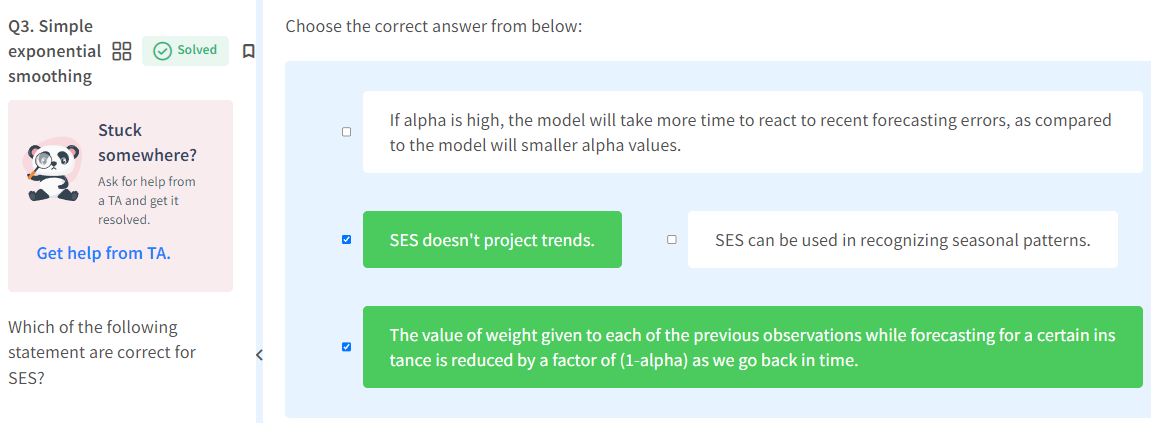

- A forecast made with smaller alpha (smoothing parameter) will take more time to react to changing expected values as compared to forecast with a higher alpha.

- As with higher alpha forecast will closely follow the observations fluctuations.

- This method is used when data pattern is approximately horizontal.


- As the equation for SES suggests, it doesn’t consider any trend or like the difference between previous observations isn’t included therefore it can’t handle trends.

- SES can’t be used in recognizing seasonal patterns.


- As there aren’t any extra terms for considering seasonal patterns therefore it can’t handle seasonal changes.

- The weight given to each further previous observation while forecasting for a certain instance is reduced by a factor of (1-alpha).

        - F(t)=alpha∗(obs(t−1))+(1−alpha)∗F(t−1),
        where F(t) refers to the forecast for instance t and obs(t-1) refers to the expected value or the true value at instance t-1.

- As F(t-1) will be solved further, the weights for each of the previous observation will be reduced by factor of (1-alpha).

In [115]:
# sda

In [ ]:
# canada_gdp  = pd.read_csv("Canada_GDP_2015_2022.csv")

In [ ]:
# canada_gdp

In [ ]:
# from datetime import datetime


In [ ]:
# canada_gdp.iloc[:,0].str.split("-").apply(lambda x:x[0]).astype("str")

In [ ]:
# "20"+canada_gdp.iloc[:,0].str.split("-").apply(lambda x:x[1]).astype("str")

In [ ]:
# canada_gdp.iloc[:,0] = pd.to_datetime(("20"+canada_gdp.iloc[:,0].str.split("-").apply(lambda x:x[1]).astype("str"))  +"-"+ (canada_gdp.iloc[:,0].str.split("-").apply(lambda x:x[0]).astype("str")))


In [ ]:
# canada_gdp

In [ ]:
# canada_gdp = canada_gdp.set_index("North American Industry Classification System (NAICS)")

In [ ]:
# canada_gdp

In [ ]:
# canada_gdp.columns

In [ ]:
# for col in canada_gdp.columns:
    
#     canada_gdp[col] = canada_gdp[col].str.replace(",","").astype("int64")

In [ ]:
# canada_gdp

In [ ]:
# plt.rcParams['figure.figsize'] = (20, 5)

# canada_gdp[canada_gdp.columns[0]].plot()

In [ ]:
# canada_gdp[canada_gdp.columns[8]]

In [ ]:
# plt.rcParams['figure.figsize'] = (20, 5)

# canada_gdp[canada_gdp.columns[8]].plot()

In [ ]:
# IT_sector = canada_gdp[canada_gdp.columns[8]] #.reset_index()
# IT_sector

In [ ]:
# IT_sector.columns = ["Time","growth"]

In [ ]:
# IT_sector

In [ ]:
# IT_sector.head(12).plot()

In [ ]:
# IT_sector.iloc[12:25].plot()

In [ ]:
# IT_sector.iloc[24:37].plot()

In [ ]:
# model = sm.tsa.seasonal_decompose(IT_sector,model  = "additive")

In [ ]:
# model.observed.plot()

In [ ]:
# model.seasonal.plot(style="-x")

In [ ]:
# model.trend.plot()

In [ ]:
# model.resid.plot(style="-x")